In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as mertics
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import sklearn.impute
#for machine learning

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

In [291]:
from IPython.html.services.config import ConfigManager 
ip  = get_ipython()
cm = ConfigManager(parent=ip, profile_dir=ip.profile_dir.location)
cm.update('notebook', {"limit_output":2000})

{'limit_output': 2000}

In [292]:
excel_file = 'Company_Data2015-1.xlsx'
df = pd.read_excel(excel_file)

In [293]:
df.head()


,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [294]:
df.shape


(3586, 67)

In [295]:
print('The number of Rows is =',df.shape[0],'\n''The number of Columns is =',df.shape[1])

The number of Rows is = 3586 
The number of Columns is = 67


In [296]:
df.describe()


,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [297]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [298]:
df.isnull().sum()


Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 67, dtype: int64

In [299]:
df.duplicated().sum()

0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth Next Year'),
  Text(3, 0, 'Equity Paid Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital Employed'),
  Text(6, 0, 'Total Debt'),
  Text(7, 0, 'Gross Block '),
  Text(8, 0, 'Net Working Capital '),
  Text(9, 0, 'Current Assets '),
  Text(10, 0, 'Current Liabilities and Provisions '),
  Text(11, 0, 'Total Assets/Liabilities '),
  Text(12, 0, 'Gross Sales'),
  Text(13, 0, 'Net Sales'),
  Text(14, 0, 'Other Income'),
  Text(15, 0, 'Value Of Output'),
  Text(16, 0, 'Cost of Production'),
  Text(17, 0, 'Selling Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Ad

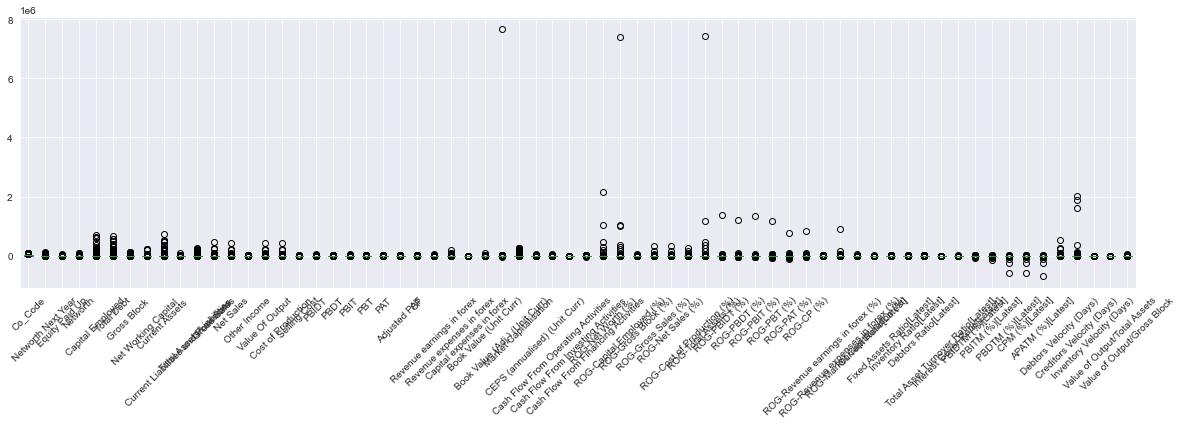

In [300]:
plt.figure(figsize = (20, 5))
df.boxplot()
plt.xticks(rotation=45)


<AxesSubplot:xlabel='Networth Next Year'>

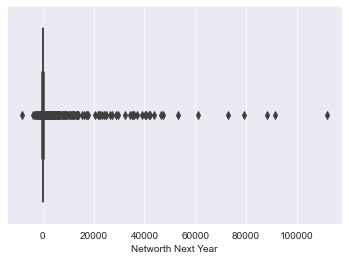

In [301]:
#import seaborn as sns
sns.boxplot(data=df,x=df['Networth Next Year'])


## Outlier treatment

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [303]:
def mod_outlier(df):
    df1 = df.copy()
    df = df._get_numeric_data()
 
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
  
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
 
    for col in df.columns:
        for i in range(0,len(df[col])):
            if df[col][i] < lower_bound[col]: 
                df[col][i] = lower_bound[col]
        
        if df[col][i] > upper_bound[col]: 
            df[col][i] = upper_bound[col] 
 
    for col in df.columns:
        df1[col] = df[col]
 
    return(df1)


In [304]:
df = mod_outlier(df)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth Next Year'),
  Text(3, 0, 'Equity Paid Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital Employed'),
  Text(6, 0, 'Total Debt'),
  Text(7, 0, 'Gross Block '),
  Text(8, 0, 'Net Working Capital '),
  Text(9, 0, 'Current Assets '),
  Text(10, 0, 'Current Liabilities and Provisions '),
  Text(11, 0, 'Total Assets/Liabilities '),
  Text(12, 0, 'Gross Sales'),
  Text(13, 0, 'Net Sales'),
  Text(14, 0, 'Other Income'),
  Text(15, 0, 'Value Of Output'),
  Text(16, 0, 'Cost of Production'),
  Text(17, 0, 'Selling Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Ad

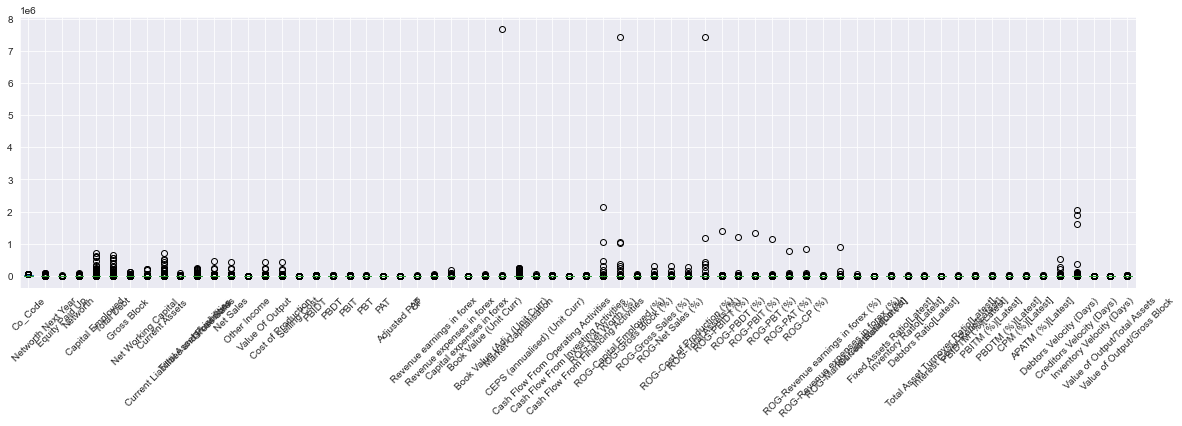

In [305]:
plt.figure(figsize = (20, 5))
df.boxplot()
plt.xticks(rotation=45)

## Treating Missing value

In [306]:
df.isna().sum()

Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 67, dtype: int64

In [307]:
df.fillna(df.median())


,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-175.74125,419.36000,-166.215,-320.90125,5936.03,474.3000,-89.40625,40.50000,...,0.000,0.000,0.000,0.000,0.000,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-175.74125,1954.93000,-166.215,4458.20000,7410.18,9070.8600,-89.40625,486.86000,...,-10.300,-21.435,-21.165,-17.085,-11.115,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-175.74125,53.84000,506.860,7714.68000,6944.54,1281.5400,4496.25000,9097.64000,...,-28.485,-21.435,-21.165,-17.085,-11.115,97,558,0.0,-0.03,-0.26
3,2439,GTL,-175.74125,157.30000,-166.215,2353.88000,2326.05,1033.6900,-89.40625,1034.12000,...,-3.330,-7.210,-21.165,-17.085,-11.115,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-175.74125,50.30000,-166.215,4675.33000,5740.90,1084.2000,1836.23000,4685.81000,...,-28.485,-21.435,-21.165,379.790,274.790,3887,346,0.0,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77000,501.30000,62009.420,590576.00000,496009.19,8463.3000,0.00000,444633.50000,...,0.000,0.000,0.000,0.000,0.000,0,0,35.0,0.60,7.76
3582,502,Vedanta,79162.19000,296.50000,34057.870,71906.06000,37643.79,29848.4400,2503.86000,11554.45000,...,39.920,32.170,29.810,30.520,22.770,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31000,2427.95000,67969.970,140686.75000,55245.01,121643.4500,6376.84000,89609.82000,...,8.090,6.690,7.310,5.690,4.290,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70000,8245.46000,81657.350,173099.14000,85995.34,128477.5900,11449.79000,42353.59000,...,28.120,20.550,23.390,19.550,11.990,32,69,42.0,0.36,0.68


In [308]:
df.isna().sum()


Co_Code                           0
Co_Name                           0
Networth Next Year                0
Equity Paid Up                    0
Networth                          0
                               ... 
Debtors Velocity (Days)           0
Creditors Velocity (Days)         0
Inventory Velocity (Days)       103
Value of Output/Total Assets      0
Value of Output/Gross Block       0
Length: 67, dtype: int64

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

#### Replacing NULL values in Numerical Columns using Median

In [310]:
median1=df["Inventory Velocity (Days)"].median()
df["Inventory Velocity (Days)"].replace(np.nan,median1,inplace=True)



In [311]:
# Check for missing value in any column
df.isnull().sum()

Co_Code                         0
Co_Name                         0
Networth Next Year              0
Equity Paid Up                  0
Networth                        0
                               ..
Debtors Velocity (Days)         0
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
Length: 67, dtype: int64

**From the above we observe that there are no null values in the dataset.**

## Ques 1.3

In [312]:
import pandas as pd
updated_df = pd.DataFrame(df,columns=['Networth Next Year'])
updated_df.loc[df['Networth Next Year'] > 0, 'default'] = '0'
updated_df.loc[df['Networth Next Year'] <= 0, 'default'] = '1'
print (updated_df)



      Networth Next Year default
0             -175.74125       1
1             -175.74125       1
2             -175.74125       1
3             -175.74125       1
4             -175.74125       1
...                  ...     ...
3581         72677.77000       0
3582         79162.19000       0
3583         88134.31000       0
3584         91293.70000       0
3585           303.52875       0

[3586 rows x 2 columns]


In [313]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-175.74125,419.36,-166.215,-320.90125,5936.03,474.30,-89.40625,40.50,...,0.000,0.000,0.000,0.000,0.000,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-175.74125,1954.93,-166.215,4458.20000,7410.18,9070.86,-89.40625,486.86,...,-10.300,-21.435,-21.165,-17.085,-11.115,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-175.74125,53.84,506.860,7714.68000,6944.54,1281.54,4496.25000,9097.64,...,-28.485,-21.435,-21.165,-17.085,-11.115,97,558,0.0,-0.03,-0.26
3,2439,GTL,-175.74125,157.30,-166.215,2353.88000,2326.05,1033.69,-89.40625,1034.12,...,-3.330,-7.210,-21.165,-17.085,-11.115,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-175.74125,50.30,-166.215,4675.33000,5740.90,1084.20,1836.23000,4685.81,...,-28.485,-21.435,-21.165,379.790,274.790,3887,346,0.0,0.01,0.05


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [315]:
updated_df.shape

(3586, 2)

In [316]:
df = pd.concat([df, updated_df], axis=1)

In [317]:
df

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,Networth Next Year,default
0,16974,Hind.Cables,-175.74125,419.36000,-166.215,-320.90125,5936.03,474.3000,-89.40625,40.50000,...,0.000,0.000,0.000,0,0,45.0,0.00,0.00,-175.74125,1
1,21214,Tata Tele. Mah.,-175.74125,1954.93000,-166.215,4458.20000,7410.18,9070.8600,-89.40625,486.86000,...,-21.165,-17.085,-11.115,29,101,2.0,0.31,0.24,-175.74125,1
2,14852,ABG Shipyard,-175.74125,53.84000,506.860,7714.68000,6944.54,1281.5400,4496.25000,9097.64000,...,-21.165,-17.085,-11.115,97,558,0.0,-0.03,-0.26,-175.74125,1
3,2439,GTL,-175.74125,157.30000,-166.215,2353.88000,2326.05,1033.6900,-89.40625,1034.12000,...,-21.165,-17.085,-11.115,93,63,2.0,0.24,1.90,-175.74125,1
4,23505,Bharati Defence,-175.74125,50.30000,-166.215,4675.33000,5740.90,1084.2000,1836.23000,4685.81000,...,-21.165,379.790,274.790,3887,346,0.0,0.01,0.05,-175.74125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77000,501.30000,62009.420,590576.00000,496009.19,8463.3000,0.00000,444633.50000,...,0.000,0.000,0.000,0,0,35.0,0.60,7.76,72677.77000,0
3582,502,Vedanta,79162.19000,296.50000,34057.870,71906.06000,37643.79,29848.4400,2503.86000,11554.45000,...,29.810,30.520,22.770,13,53,77.0,0.29,1.00,79162.19000,0
3583,12002,I O C L,88134.31000,2427.95000,67969.970,140686.75000,55245.01,121643.4500,6376.84000,89609.82000,...,7.310,5.690,4.290,7,30,48.0,1.42,3.24,88134.31000,0
3584,12001,NTPC,91293.70000,8245.46000,81657.350,173099.14000,85995.34,128477.5900,11449.79000,42353.59000,...,23.390,19.550,11.990,32,69,42.0,0.36,0.68,91293.70000,0


#### We have found that the column name: "Networth Next Year" is a duplicated column. We shall thus remove this column from the dataframe.

In [318]:
df = df.loc[:,~df.columns.duplicated()]

In [319]:
df

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
0,16974,Hind.Cables,-175.74125,419.36000,-166.215,-320.90125,5936.03,474.3000,-89.40625,40.50000,...,0.000,0.000,0.000,0.000,0,0,45.0,0.00,0.00,1
1,21214,Tata Tele. Mah.,-175.74125,1954.93000,-166.215,4458.20000,7410.18,9070.8600,-89.40625,486.86000,...,-21.435,-21.165,-17.085,-11.115,29,101,2.0,0.31,0.24,1
2,14852,ABG Shipyard,-175.74125,53.84000,506.860,7714.68000,6944.54,1281.5400,4496.25000,9097.64000,...,-21.435,-21.165,-17.085,-11.115,97,558,0.0,-0.03,-0.26,1
3,2439,GTL,-175.74125,157.30000,-166.215,2353.88000,2326.05,1033.6900,-89.40625,1034.12000,...,-7.210,-21.165,-17.085,-11.115,93,63,2.0,0.24,1.90,1
4,23505,Bharati Defence,-175.74125,50.30000,-166.215,4675.33000,5740.90,1084.2000,1836.23000,4685.81000,...,-21.435,-21.165,379.790,274.790,3887,346,0.0,0.01,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,4987,HDFC Bank,72677.77000,501.30000,62009.420,590576.00000,496009.19,8463.3000,0.00000,444633.50000,...,0.000,0.000,0.000,0.000,0,0,35.0,0.60,7.76,0
3582,502,Vedanta,79162.19000,296.50000,34057.870,71906.06000,37643.79,29848.4400,2503.86000,11554.45000,...,32.170,29.810,30.520,22.770,13,53,77.0,0.29,1.00,0
3583,12002,I O C L,88134.31000,2427.95000,67969.970,140686.75000,55245.01,121643.4500,6376.84000,89609.82000,...,6.690,7.310,5.690,4.290,7,30,48.0,1.42,3.24,0
3584,12001,NTPC,91293.70000,8245.46000,81657.350,173099.14000,85995.34,128477.5900,11449.79000,42353.59000,...,20.550,23.390,19.550,11.990,32,69,42.0,0.36,0.68,0


**From the above, we can infer that we have removed the column, 'Networth Next Year'**

In [320]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [321]:
df.describe()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3586.000000,3586.000000,3586.000000
mean,16065.388734,707.108613,62.421260,636.908989,2771.467968,1988.859230,566.360642,440.117208,1957.110213,385.319079,...,32.552975,28.544750,21.486001,22.924360,18.461176,603.894032,2.057855e+03,78.377579,0.819757,61.904651
std,19776.817379,4387.810742,778.090265,3876.524515,26921.785595,23650.601878,4579.319007,6282.050351,22576.970863,2645.547314,...,500.744604,489.375258,375.001951,397.710114,373.651044,10636.759580,5.416948e+04,136.029493,1.201400,976.822485
min,4.000000,-175.741250,0.000000,-166.215000,-320.901250,-0.720000,-41.190000,-89.406250,-0.910000,-0.230000,...,-28.485000,-21.435000,-21.165000,-17.085000,-11.115000,0.000000,0.000000e+00,-144.000000,-0.330000,-6.690000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,93.000000,1.160000,4.910000
max,72493.000000,91293.700000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


**What does variable 'default' look like**

In [322]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

**Checking proportion of default**

In [323]:
df['default'].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64

**Lets check for missing values in the dataset**

In [324]:
df.isnull().sum()

Co_Code                         0
Co_Name                         0
Networth Next Year              0
Equity Paid Up                  0
Networth                        0
                               ..
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 68, dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

(0.0, 100.0)

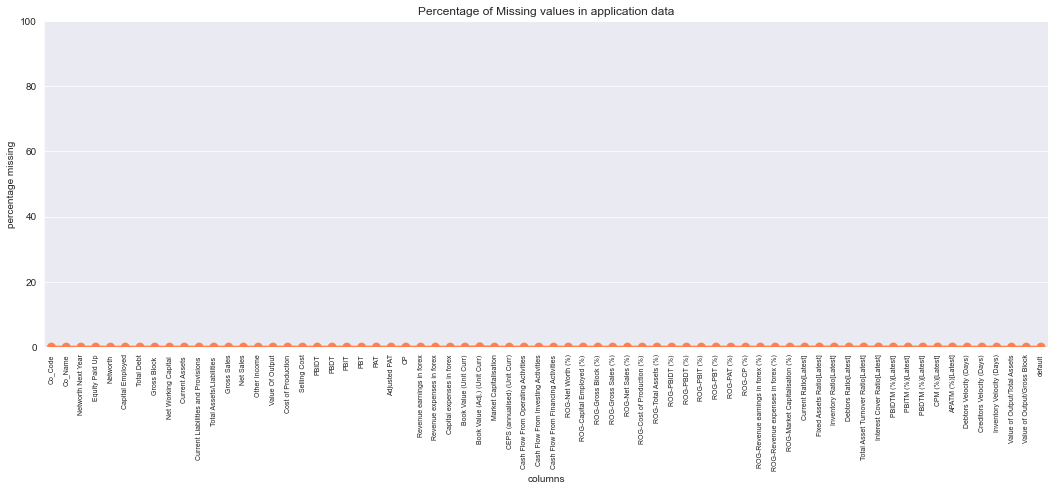

In [326]:
# Missing data in main dataset

fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
miss_data["type"] = "application data"
sns.set_style('darkgrid')
ax = sns.pointplot("index",0,data=miss_data, color='coral')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("percentage missing")
plt.xlabel("columns")
plt.ylim((0,100))

**From the above, we can infer that we do not have any missing data in the given dataset.**

## Outlier Detection

In [327]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=df[i].quantile(0.95)
  min_thresold=df[i].quantile(0.05)
  credit_df_no_outlier=df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((df.shape[0]-credit_df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  Co_Code is 10 %
 outlier in  Networth Next Year is 10 %
 outlier in  Equity Paid Up is 10 %
 outlier in  Networth is 10 %
 outlier in  Capital Employed is 10 %
 outlier in  Total Debt is 28 %
 outlier in  Gross Block  is 16 %
 outlier in  Net Working Capital  is 10 %
 outlier in  Current Assets  is 10 %
 outlier in  Current Liabilities and Provisions  is 11 %
 outlier in  Total Assets/Liabilities  is 10 %
 outlier in  Gross Sales is 13 %
 outlier in  Net Sales is 13 %
 outlier in  Other Income is 24 %
 outlier in  Value Of Output is 14 %
 outlier in  Cost of Production is 11 %
 outlier in  Selling Cost is 31 %
 outlier in  PBIDT is 10 %
 outlier in  PBDT is 10 %
 outlier in  PBIT is 10 %
 outlier in  PBT is 13 %
 outlier in  PAT is 13 %
 outlier in  Adjusted PAT is 13 %
 outlier in  CP is 10 %
 outlier in  Revenue earnings in forex is 67 %
 outlier in  Revenue expenses in forex is 58 %
 outlier in  Capital expenses in forex is 85 %
 outlier in  Book Value (Unit Curr) is 10

**The above output gives the percentage of outliers in each of the columns.**

In [328]:
# remove outliers from columns having nearly 10% outliers
max_thresold_Networth_Next_Year=df["Networth Next Year"].quantile(0.95)
min_thresold_Networth_Next_Year=df["Networth Next Year"].quantile(0.05)

max_thresold_Equity_Paid_Up=df["Equity Paid Up"].quantile(0.95)
min_thresold_Equity_Paid_Up=df["Equity Paid Up"].quantile(0.05)

max_thresold_Networth=df["Networth"].quantile(0.95)
min_thresold_Networth=df["Networth"].quantile(0.05)


max_thresold_Capital_Employed=df["Capital Employed"].quantile(0.95)
min_thresold_Capital_Employed=df["Capital Employed"].quantile(0.05)


In [329]:
max_thresold_PBIDT=df["PBIDT"].quantile(0.95)
min_thresold_PBIDT=df["PBIDT"].quantile(0.05)

max_thresold_PBDT=df["PBDT"].quantile(0.95)
min_thresold_PBDT=df["PBDT"].quantile(0.05)


max_thresold_PBIT=df["PBIT"].quantile(0.95)
min_thresold_PBIT=df["PBIT"].quantile(0.05)


max_thresold_CP=df["CP"].quantile(0.95)
min_thresold_CP=df["CP"].quantile(0.05)


max_thresold_Book_Value_Unit_Curr=df["Book Value (Unit Curr)"].quantile(0.95)
min_thresold_Book_Value_Unit_Curr=df["Book Value (Unit Curr)"].quantile(0.05)


max_thresold_Book_Value_Adj_Unit_Curr=df["Book Value (Adj.) (Unit Curr)"].quantile(0.95)
min_thresold_Book_Value_Adj_Unit_Curr=df["Book Value (Adj.) (Unit Curr)"].quantile(0.05)



max_thresold_CEPS_annualised_Unit_Curr=df["CEPS (annualised) (Unit Curr)"].quantile(0.95)
min_thresold_CEPS_annualised_Unit_Curr=df["CEPS (annualised) (Unit Curr)"].quantile(0.05)



max_thresold_Cash_Flow_From_Operating_Activities=df["Cash Flow From Operating Activities"].quantile(0.95)
min_thresold_Cash_Flow_From_Operating_Activities=df["Cash Flow From Operating Activities"].quantile(0.05)



max_thresold_ROG_Total_Assets=df["ROG-Total Assets (%)"].quantile(0.95)
min_thresold_ROG_Total_Assets=df["ROG-Total Assets (%)"].quantile(0.05)


max_thresold_ROG_Market_Capitalisation=df["ROG-Market Capitalisation (%)"].quantile(0.95)
min_thresold_ROG_Market_Capitalisation=df["ROG-Market Capitalisation (%)"].quantile(0.05)


max_thresold_Current_Ratio_Latest=df["Current Ratio[Latest]"].quantile(0.95)
min_thresold_Current_Ratio_Latest=df["Current Ratio[Latest]"].quantile(0.05)


max_thresold_Interest_Cover_Ratio_Latest=df["Interest Cover Ratio[Latest]"].quantile(0.95)
min_thresold_Interest_Cover_Ratio_Latest=df["Interest Cover Ratio[Latest]"].quantile(0.05)


In [330]:
max_thresold_Net_Working_Capital=df["Net Working Capital "].quantile(0.95)
min_thresold_Net_Working_Capital=df["Net Working Capital "].quantile(0.05)

In [331]:
max_thresold_Current_Assets=df["Current Assets "].quantile(0.95)
min_thresold_Current_Assets=df["Current Assets "].quantile(0.05)


max_thresold_Total_Assets_Liabilities=df["Total Assets/Liabilities "].quantile(0.95)
min_thresold_Total_Assets_Liabilities=df["Total Assets/Liabilities "].quantile(0.05)

In [332]:
credit_df_no_outlier=df[(df["Networth Next Year"] < max_thresold_Networth_Next_Year) & (df["Networth Next Year"] > min_thresold_Networth_Next_Year)
   &  (df["Equity Paid Up"] < max_thresold_Equity_Paid_Up) & (df["Equity Paid Up"] > min_thresold_Equity_Paid_Up)
   &  (df["Networth"] < max_thresold_Networth) & (df["Networth"] > min_thresold_Networth)
   &  (df["Capital Employed"] < max_thresold_Capital_Employed) & (df["Capital Employed"] > min_thresold_Capital_Employed)
   &  (df["Net Working Capital "] < max_thresold_Net_Working_Capital) & (df["Net Working Capital "] > min_thresold_Net_Working_Capital)
   &  (df["Current Assets "] < max_thresold_Current_Assets) & (df["Current Assets "] > min_thresold_Current_Assets)
   &  (df["Total Assets/Liabilities "] < max_thresold_Total_Assets_Liabilities) & (df["Total Assets/Liabilities "] > min_thresold_Total_Assets_Liabilities)                
   &  (df["PBIDT"] < max_thresold_PBIDT) & (df["PBIDT"] > min_thresold_PBIDT)&  (df["PBDT"] < max_thresold_PBDT) & (df["PBDT"] > min_thresold_PBDT)                    
   &  (df["PBIT"] < max_thresold_PBIT) & (df["PBIT"] > min_thresold_PBIT)                                                 
   &  (df["CP"] < max_thresold_CP) & (df["CP"] > min_thresold_CP)
   &  (df["Book Value (Unit Curr)"] < max_thresold_Book_Value_Unit_Curr) & (df["Book Value (Unit Curr)"] > min_thresold_Book_Value_Unit_Curr)
   &  (df["Book Value (Adj.) (Unit Curr)"] < max_thresold_Book_Value_Adj_Unit_Curr) & (df["Book Value (Adj.) (Unit Curr)"] > min_thresold_Book_Value_Adj_Unit_Curr)                        
   &  (df["CEPS (annualised) (Unit Curr)"] < max_thresold_CEPS_annualised_Unit_Curr) & (df["CEPS (annualised) (Unit Curr)"] > min_thresold_CEPS_annualised_Unit_Curr)
   &  (df["Cash Flow From Operating Activities"] < max_thresold_Cash_Flow_From_Operating_Activities) & (df["Cash Flow From Operating Activities"] > min_thresold_Cash_Flow_From_Operating_Activities)  
   &  (df["ROG-Total Assets (%)"] < max_thresold_ROG_Total_Assets) & (df["ROG-Total Assets (%)"] > min_thresold_ROG_Total_Assets) 
   &  (df["ROG-Market Capitalisation (%)"] < max_thresold_ROG_Market_Capitalisation) & (df["ROG-Market Capitalisation (%)"] > min_thresold_ROG_Market_Capitalisation)
   &  (df["Current Ratio[Latest]"] < max_thresold_Current_Ratio_Latest) & (df["Current Ratio[Latest]"] > min_thresold_Current_Ratio_Latest)
   & (df["Interest Cover Ratio[Latest]"] < max_thresold_Interest_Cover_Ratio_Latest) & (df["Interest Cover Ratio[Latest]"] > min_thresold_Interest_Cover_Ratio_Latest)]
      


                        
                        

In [333]:
credit_df_no_outlier.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
184,20790,Visu Intl.,-15.75,38.33,1.11,16.60,15.49,0.00,-3.59,0.18,...,0.000,0.000,0.000,0.000,0,895,0.0,0.00,0.00,1
198,3502,S R Inds.,-12.20,13.89,-10.14,42.51,37.86,30.09,19.90,34.85,...,15.510,6.160,6.160,2.320,81,87,129.0,0.80,1.44,1
200,6495,Trident Tools,-11.93,14.04,2.73,82.51,76.34,71.74,21.34,36.59,...,-21.435,-21.165,-17.085,-11.115,49,60,171.0,0.00,-0.01,1
205,21315,Kesoram Textile,-10.97,10.46,-11.13,1.51,9.56,26.85,0.50,1.42,...,0.000,0.000,0.000,0.000,0,0,0.0,0.00,0.00,1
206,3736,Athena Global,-10.33,7.86,-3.73,11.34,2.79,17.45,-0.05,8.82,...,2.650,4.060,4.060,1.510,118,135,616.0,0.65,0.59,1


**Looking at the Outlier Distribution after treatment**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth Next Year'),
  Text(3, 0, 'Equity Paid Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital Employed'),
  Text(6, 0, 'Total Debt'),
  Text(7, 0, 'Gross Block '),
  Text(8, 0, 'Net Working Capital '),
  Text(9, 0, 'Current Assets '),
  Text(10, 0, 'Current Liabilities and Provisions '),
  Text(11, 0, 'Total Assets/Liabilities '),
  Text(12, 0, 'Gross Sales'),
  Text(13, 0, 'Net Sales'),
  Text(14, 0, 'Other Income'),
  Text(15, 0, 'Value Of Output'),
  Text(16, 0, 'Cost of Production'),
  Text(17, 0, 'Selling Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Ad

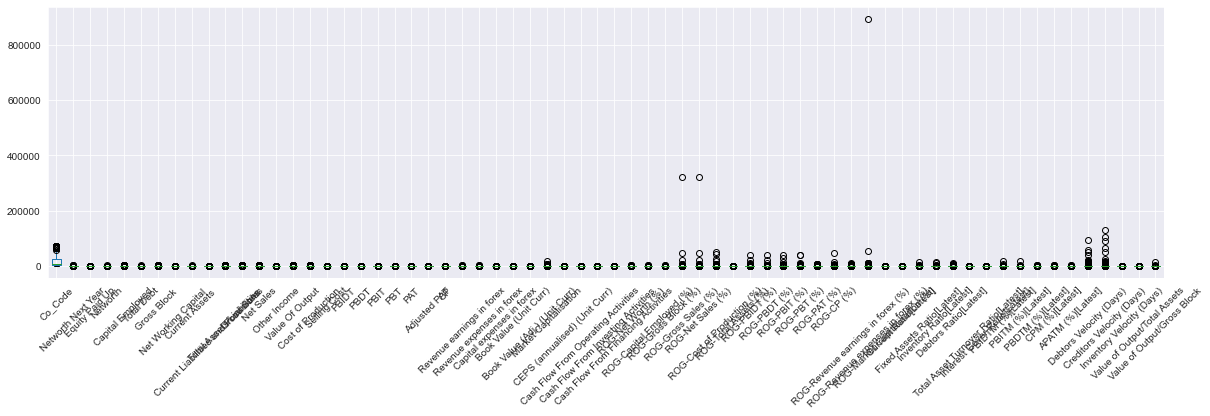

In [334]:
plt.figure(figsize = (20, 5))
credit_df_no_outlier.boxplot()
plt.xticks(rotation=45)

**From the above we can infer that the variables that we had considered for Outlier treatment have been treated, and we don't see any outliers present in those variables anymore.**

**Checking Data Correlation**

<AxesSubplot:>

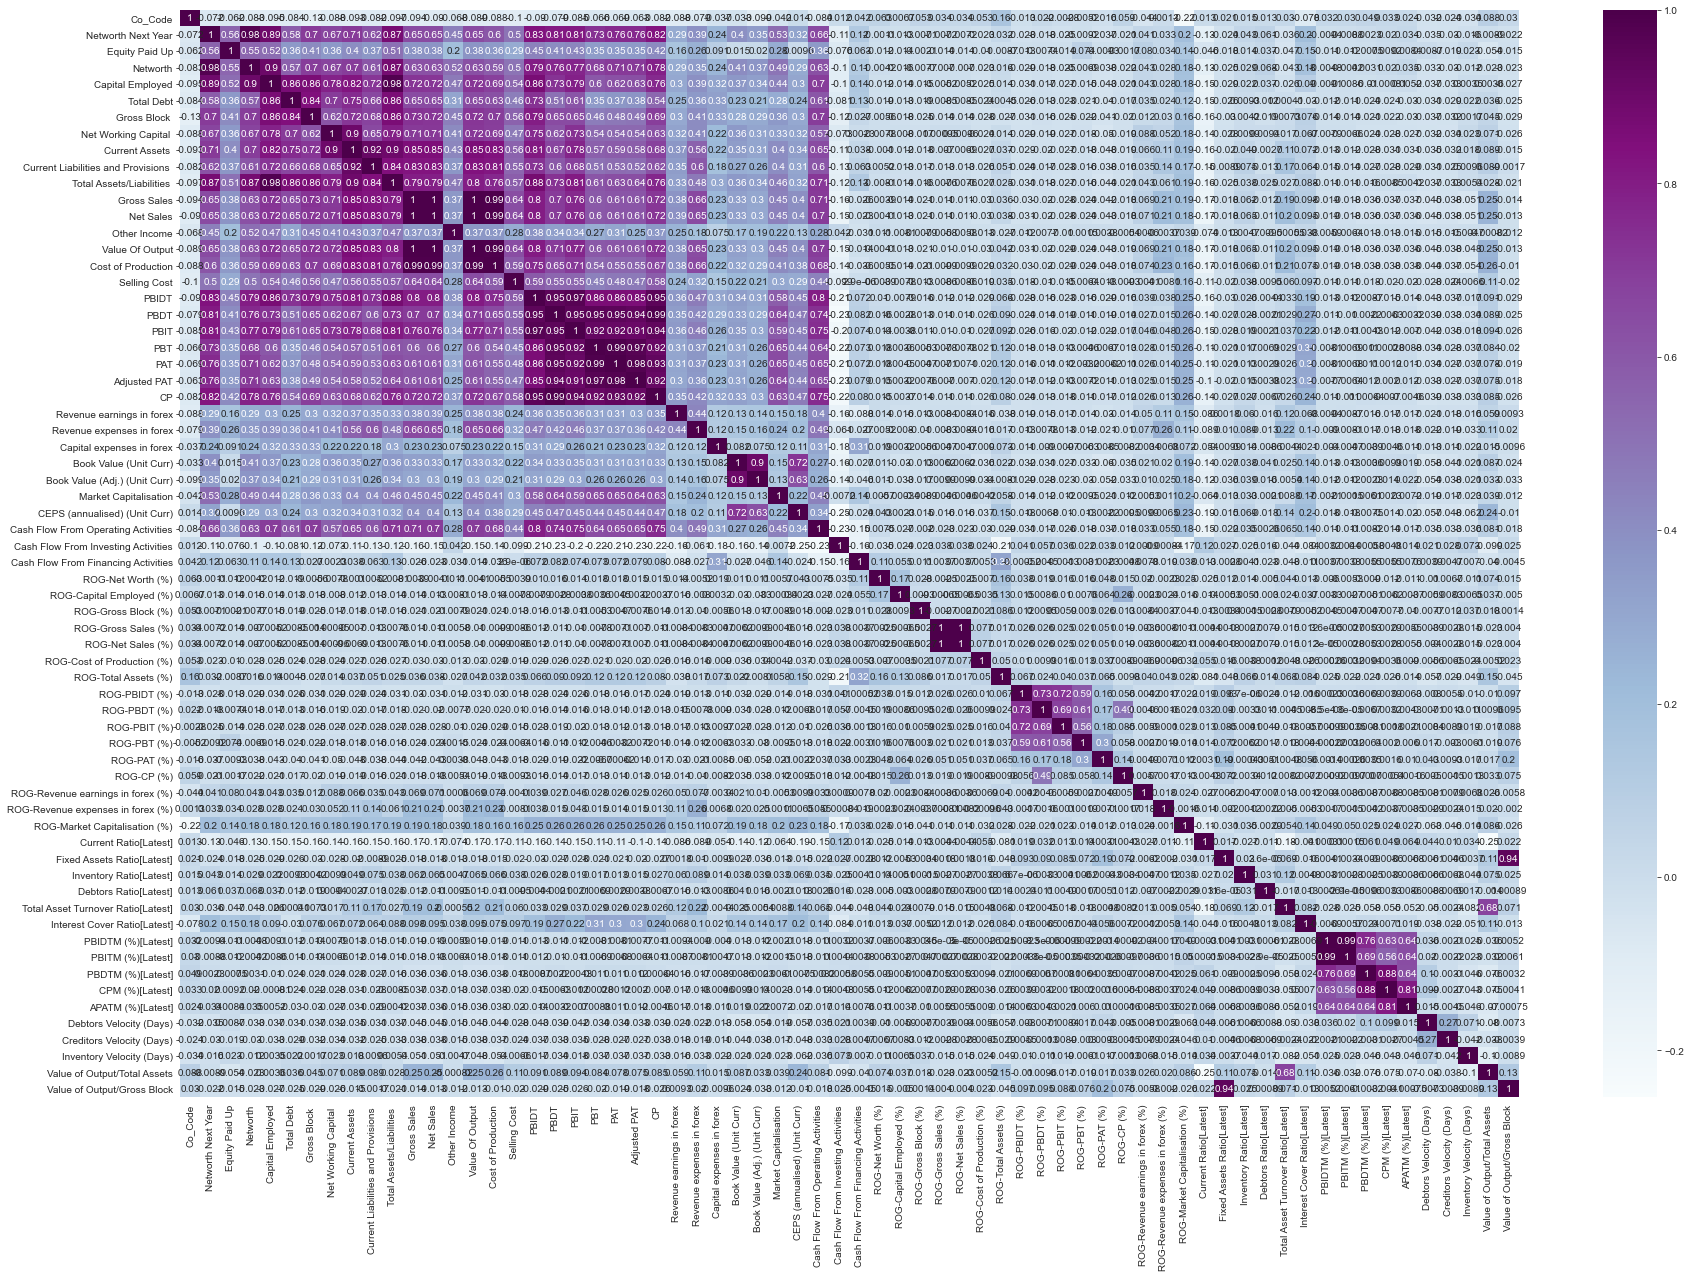

In [335]:
# correlation matrix of DataFrame
plt.figure(figsize=(30,20))
corn=credit_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu")

In [336]:
##Correlation Matrix
credit_df_no_outlier.corr()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
Co_Code,1.000000,-0.071569,-0.062429,-0.083072,-0.094532,-0.084003,-0.128626,-0.088174,-0.093268,-0.081872,...,0.032485,0.030200,0.048819,0.032506,0.024352,-0.031898,-0.024394,-0.034462,0.087726,0.029757
Networth Next Year,-0.071569,1.000000,0.558706,0.977663,0.894896,0.579019,0.703758,0.668629,0.706863,0.620185,...,-0.009384,-0.008806,0.002254,0.019712,0.033996,-0.034850,-0.030378,-0.016488,-0.008941,-0.021833
Equity Paid Up,-0.062429,0.558706,1.000000,0.546541,0.519982,0.359964,0.412944,0.360694,0.402471,0.370949,...,-0.011080,-0.012130,-0.007480,0.009150,0.008398,0.008710,-0.018573,0.022724,-0.054157,-0.015093
Networth,-0.083072,0.977663,0.546541,1.000000,0.903577,0.571051,0.698684,0.672022,0.700196,0.605691,...,-0.004815,-0.004158,0.003139,0.020162,0.035119,-0.033293,-0.030021,-0.012036,-0.022893,-0.022538
Capital Employed,-0.094532,0.894896,0.519982,0.903577,1.000000,0.863502,0.858986,0.783129,0.823235,0.718344,...,-0.009113,-0.008625,-0.010429,-0.000809,0.005177,-0.036624,-0.033406,0.003482,0.003594,-0.026890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),-0.031898,-0.034850,0.008710,-0.033293,-0.036624,-0.030799,-0.036547,-0.032489,-0.034830,-0.030965,...,0.036379,0.019770,0.102482,0.099078,0.015398,1.000000,0.266136,0.070702,-0.080050,-0.007257
Creditors Velocity (Days),-0.024394,-0.030378,-0.018573,-0.030021,-0.033406,-0.028658,-0.031824,-0.034331,-0.032034,-0.024515,...,-0.002067,-0.002211,-0.003094,-0.002746,-0.004505,0.266136,1.000000,-0.041625,-0.037782,-0.003886
Inventory Velocity (Days),-0.034462,-0.016488,0.022724,-0.012036,0.003482,0.021803,0.001748,0.023492,0.017739,0.009584,...,-0.024543,-0.022849,-0.045797,-0.043457,-0.045819,0.070702,-0.041625,1.000000,-0.104649,-0.008895
Value of Output/Total Assets,0.087726,-0.008941,-0.054157,-0.022893,0.003594,0.035656,0.045403,0.071448,0.088907,0.089275,...,-0.036277,-0.032117,-0.076436,-0.075174,-0.070469,-0.080050,-0.037782,-0.104649,1.000000,0.125084


In [337]:
# Check for missing value in any column
credit_df_no_outlier.isnull().sum()

Co_Code                         0
Co_Name                         0
Networth Next Year              0
Equity Paid Up                  0
Networth                        0
                               ..
Creditors Velocity (Days)       0
Inventory Velocity (Days)       0
Value of Output/Total Assets    0
Value of Output/Gross Block     0
default                         0
Length: 68, dtype: int64

**No Missing Values in the credit_df_no_outlier dataframe**

In [338]:
credit_df_no_outlier

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
184,20790,Visu Intl.,-15.75,38.33,1.11,16.60,15.49,0.00,-3.59,0.18,...,0.000,0.000,0.000,0.000,0,895,0.0,0.00,0.00,1
198,3502,S R Inds.,-12.20,13.89,-10.14,42.51,37.86,30.09,19.90,34.85,...,15.510,6.160,6.160,2.320,81,87,129.0,0.80,1.44,1
200,6495,Trident Tools,-11.93,14.04,2.73,82.51,76.34,71.74,21.34,36.59,...,-21.435,-21.165,-17.085,-11.115,49,60,171.0,0.00,-0.01,1
205,21315,Kesoram Textile,-10.97,10.46,-11.13,1.51,9.56,26.85,0.50,1.42,...,0.000,0.000,0.000,0.000,0,0,0.0,0.00,0.00,1
206,3736,Athena Global,-10.33,7.86,-3.73,11.34,2.79,17.45,-0.05,8.82,...,2.650,4.060,4.060,1.510,118,135,616.0,0.65,0.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,24988,Mcleod Russel,1388.16,54.73,1328.84,1766.74,404.37,1697.28,274.90,588.04,...,7.760,4.730,7.110,1.550,12,22,47.0,0.62,0.97,0
3358,23296,IIFL Holdings,1475.89,62.05,1400.07,1450.42,50.00,1.48,45.44,64.19,...,92.310,89.080,81.810,81.510,5,0,0.0,0.13,82.02,0
3365,28294,Brigade Enterpr.,1526.90,112.74,1316.55,2600.30,1241.45,1409.46,223.37,1191.82,...,26.260,20.720,16.550,9.980,9,130,573.0,0.38,1.74,0
3370,1252,Finolex Inds.,1569.85,124.10,787.40,1433.49,637.06,1893.94,316.86,748.36,...,17.820,19.150,13.630,11.790,6,26,90.0,1.24,2.17,0


**Creating a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

## Outlier Treatment 

In [339]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [340]:
lravg_Networth_Next_Year,uravg_Networth_Next_Year=remove_outlier(credit_df_no_outlier['Networth Next Year'])
credit_df_no_outlier['Networth Next Year']=np.where(credit_df_no_outlier['Networth Next Year']>uravg_Networth_Next_Year,uravg_Networth_Next_Year,credit_df_no_outlier['Networth Next Year'])
credit_df_no_outlier['Networth Next Year']=np.where(credit_df_no_outlier['Networth Next Year']<lravg_Networth_Next_Year,lravg_Networth_Next_Year,credit_df_no_outlier['Networth Next Year'])

lravg_Networth_Next_Year

-96.19500000000002

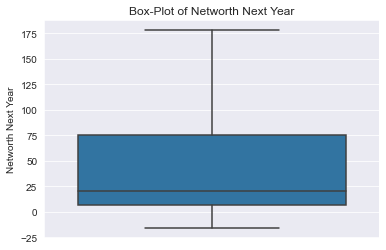

In [341]:
sns.boxplot(y = "Networth Next Year",data=credit_df_no_outlier)
plt.title("Box-Plot of Networth Next Year")
plt.show()

In [342]:
lravg_Equity_Paid_Up,uravg_Equity_Paid_Up=remove_outlier(credit_df_no_outlier['Equity Paid Up'])
credit_df_no_outlier['Equity Paid Up']=np.where(credit_df_no_outlier['Equity Paid Up']>uravg_Equity_Paid_Up,uravg_Equity_Paid_Up,credit_df_no_outlier['Equity Paid Up'])
credit_df_no_outlier['Equity Paid Up']=np.where(credit_df_no_outlier['Equity Paid Up']<lravg_Equity_Paid_Up,lravg_Equity_Paid_Up,credit_df_no_outlier['Equity Paid Up'])

lravg_Equity_Paid_Up

-10.975

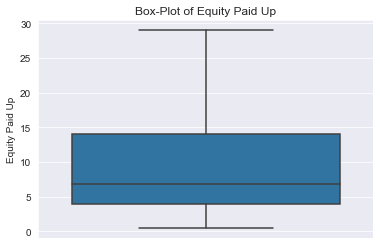

In [343]:
sns.boxplot(y = "Equity Paid Up",data=credit_df_no_outlier)
plt.title("Box-Plot of Equity Paid Up")
plt.show()

In [344]:
lravg_Networth,uravg_Networth=remove_outlier(credit_df_no_outlier['Networth'])
credit_df_no_outlier['Networth']=np.where(credit_df_no_outlier['Networth']>uravg_Networth,uravg_Networth,credit_df_no_outlier['Networth'])
credit_df_no_outlier['Networth']=np.where(credit_df_no_outlier['Networth']<lravg_Networth,lravg_Networth,credit_df_no_outlier['Networth'])

lravg_Networth

-92.37500000000001

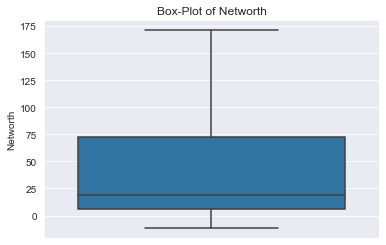

In [345]:
sns.boxplot(y = "Networth",data=credit_df_no_outlier)
plt.title("Box-Plot of Networth")
plt.show()

In [346]:
lravg_Capital_Employed,uravg_Capital_Employed=remove_outlier(credit_df_no_outlier['Capital Employed'])
credit_df_no_outlier['Capital Employed']=np.where(credit_df_no_outlier['Capital Employed']>uravg_Capital_Employed,uravg_Capital_Employed,credit_df_no_outlier['Capital Employed'])
credit_df_no_outlier['Capital Employed']=np.where(credit_df_no_outlier['Capital Employed']<lravg_Capital_Employed,lravg_Capital_Employed,credit_df_no_outlier['Capital Employed'])

lravg_Capital_Employed

-154.695

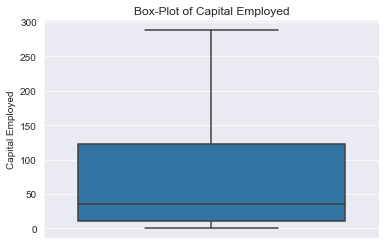

In [347]:
sns.boxplot(y = "Capital Employed",data=credit_df_no_outlier)
plt.title("Box-Plot of Capital Employed")
plt.show()

In [348]:
lravg_Net_Working_Capital,uravg_Net_Working_Capital=remove_outlier(credit_df_no_outlier['Net Working Capital '])
credit_df_no_outlier['Net Working Capital ']=np.where(credit_df_no_outlier['Net Working Capital ']>uravg_Net_Working_Capital,uravg_Net_Working_Capital,credit_df_no_outlier['Net Working Capital '])
credit_df_no_outlier['Net Working Capital ']=np.where(credit_df_no_outlier['Net Working Capital ']<lravg_Net_Working_Capital,lravg_Net_Working_Capital,credit_df_no_outlier['Net Working Capital '])

lravg_Net_Working_Capital

-66.83999999999999

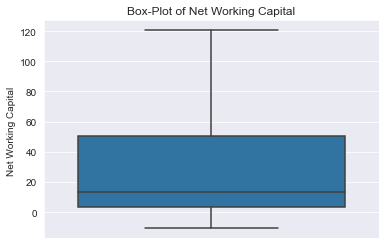

In [349]:
sns.boxplot(y = "Net Working Capital ",data=credit_df_no_outlier)
plt.title("Box-Plot of Net Working Capital")
plt.show()

In [350]:
lravg_Current_Assets,uravg_Current_Assets=remove_outlier(credit_df_no_outlier['Current Assets '])
credit_df_no_outlier['Current Assets ']=np.where(credit_df_no_outlier['Current Assets ']>uravg_Current_Assets,uravg_Current_Assets,credit_df_no_outlier['Current Assets '])
credit_df_no_outlier['Current Assets ']=np.where(credit_df_no_outlier['Current Assets ']<lravg_Current_Assets,lravg_Current_Assets,credit_df_no_outlier['Current Assets '])

lravg_Current_Assets

-110.255

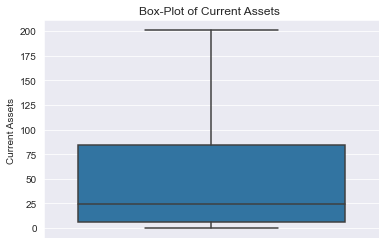

In [351]:
sns.boxplot(y = "Current Assets ",data=credit_df_no_outlier)
plt.title("Box-Plot of Current Assets ")
plt.show()

In [352]:
lravg_Total_Assets_Liabilities,uravg_Total_Assets_Liabilities=remove_outlier(credit_df_no_outlier['Total Assets/Liabilities '])
credit_df_no_outlier['Total Assets/Liabilities ']=np.where(credit_df_no_outlier['Total Assets/Liabilities ']>uravg_Total_Assets_Liabilities,uravg_Total_Assets_Liabilities,credit_df_no_outlier['Total Assets/Liabilities '])
credit_df_no_outlier['Total Assets/Liabilities ']=np.where(credit_df_no_outlier['Total Assets/Liabilities ']<lravg_Total_Assets_Liabilities,lravg_Total_Assets_Liabilities,credit_df_no_outlier['Total Assets/Liabilities '])

lravg_Total_Assets_Liabilities

-200.27000000000004

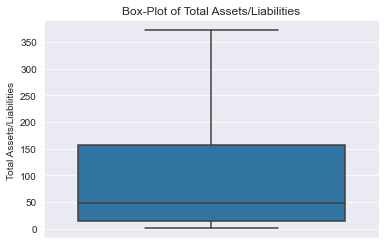

In [353]:
sns.boxplot(y = "Total Assets/Liabilities ",data=credit_df_no_outlier)
plt.title("Box-Plot of Total Assets/Liabilities")
plt.show()

In [354]:
lravg_PBIDT,uravg_PBIDT=remove_outlier(credit_df_no_outlier['PBIDT'])
credit_df_no_outlier['PBIDT']=np.where(credit_df_no_outlier['PBIDT']>uravg_PBIDT,uravg_PBIDT,credit_df_no_outlier['PBIDT'])
credit_df_no_outlier['PBIDT']=np.where(credit_df_no_outlier['PBIDT']<lravg_PBIDT,lravg_PBIDT,credit_df_no_outlier['PBIDT'])

lravg_PBIDT

-22.495

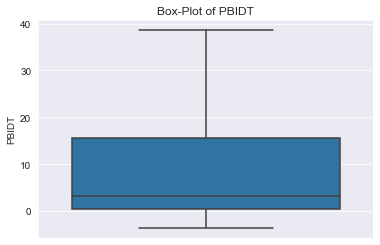

In [355]:
sns.boxplot(y = "PBIDT",data=credit_df_no_outlier)
plt.title("Box-Plot of PBIDT")
plt.show()

In [356]:
lravg_PBDT,uravg_PBDT=remove_outlier(credit_df_no_outlier['PBDT'])
credit_df_no_outlier['PBDT']=np.where(credit_df_no_outlier['PBDT']>uravg_PBDT,uravg_PBDT,credit_df_no_outlier['PBDT'])
credit_df_no_outlier['PBDT']=np.where(credit_df_no_outlier['PBDT']<lravg_PBDT,lravg_PBDT,credit_df_no_outlier['PBDT'])

lravg_PBDT

-14.18

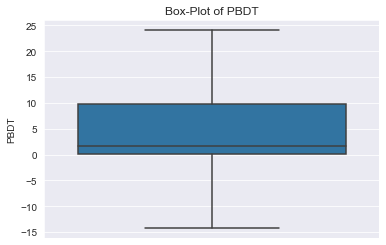

In [357]:
sns.boxplot(y = "PBDT",data=credit_df_no_outlier)
plt.title("Box-Plot of PBDT")
plt.show()

In [358]:
lravg_PBIT,uravg_PBIT=remove_outlier(credit_df_no_outlier['PBIT'])
credit_df_no_outlier['PBIT']=np.where(credit_df_no_outlier['PBIT']>uravg_PBIT,uravg_PBIT,credit_df_no_outlier['PBIT'])
credit_df_no_outlier['PBIT']=np.where(credit_df_no_outlier['PBIT']<lravg_PBIT,lravg_PBIT,credit_df_no_outlier['PBIT'])

lravg_PBIT

-16.464999999999996

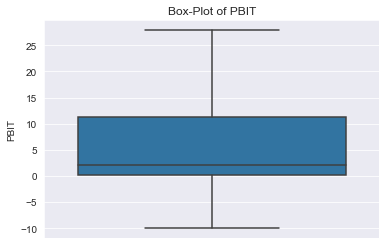

In [359]:
sns.boxplot(y = "PBIT",data=credit_df_no_outlier)
plt.title("Box-Plot of PBIT")
plt.show()

In [360]:
lravg_CP,uravg_CP=remove_outlier(credit_df_no_outlier['CP'])
credit_df_no_outlier['CP']=np.where(credit_df_no_outlier['CP']>uravg_CP,uravg_CP,credit_df_no_outlier['CP'])
credit_df_no_outlier['CP']=np.where(credit_df_no_outlier['CP']<lravg_CP,lravg_CP,credit_df_no_outlier['CP'])

lravg_CP

-11.639999999999999

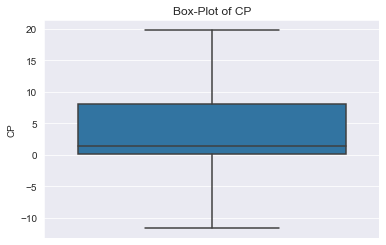

In [361]:
sns.boxplot(y = "CP",data=credit_df_no_outlier)
plt.title("Box-Plot of CP")
plt.show()

In [362]:
lravg_Book_Value_Unit_Curr,uravg_Book_Value_Unit_Curr=remove_outlier(credit_df_no_outlier['Book Value (Unit Curr)'])
credit_df_no_outlier['Book Value (Unit Curr)']=np.where(credit_df_no_outlier['Book Value (Unit Curr)']>uravg_Book_Value_Unit_Curr,uravg_Book_Value_Unit_Curr,credit_df_no_outlier['Book Value (Unit Curr)'])
credit_df_no_outlier['Book Value (Unit Curr)']=np.where(credit_df_no_outlier['Book Value (Unit Curr)']<lravg_Book_Value_Unit_Curr,lravg_Book_Value_Unit_Curr,credit_df_no_outlier['Book Value (Unit Curr)'])

lravg_Book_Value_Unit_Curr

-56.440000000000005

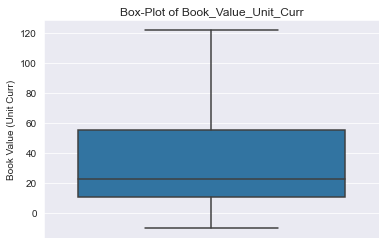

In [363]:
sns.boxplot(y = "Book Value (Unit Curr)",data=credit_df_no_outlier)
plt.title("Box-Plot of Book_Value_Unit_Curr")
plt.show()

In [364]:
lravg_Book_Value_Adj_Unit_Curr,uravg_Book_Value_Adj_Unit_Curr=remove_outlier(credit_df_no_outlier['Book Value (Adj.) (Unit Curr)'])
credit_df_no_outlier['Book Value (Adj.) (Unit Curr)']=np.where(credit_df_no_outlier['Book Value (Adj.) (Unit Curr)']>uravg_Book_Value_Adj_Unit_Curr,uravg_Book_Value_Adj_Unit_Curr,credit_df_no_outlier['Book Value (Adj.) (Unit Curr)'])
credit_df_no_outlier['Book Value (Adj.) (Unit Curr)']=np.where(credit_df_no_outlier['Book Value (Adj.) (Unit Curr)']<lravg_Book_Value_Adj_Unit_Curr,lravg_Book_Value_Adj_Unit_Curr,credit_df_no_outlier['Book Value (Adj.) (Unit Curr)'])

lravg_Book_Value_Adj_Unit_Curr

-48.645

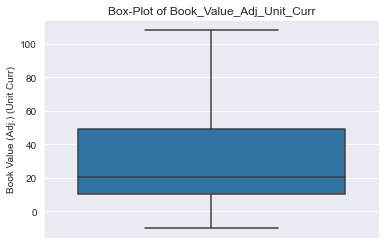

In [365]:
sns.boxplot(y = "Book Value (Adj.) (Unit Curr)",data=credit_df_no_outlier)
plt.title("Box-Plot of Book_Value_Adj_Unit_Curr")
plt.show()

In [366]:
lravg_CEPS_annualised_Unit_Curr,uravg_CEPS_annualised_Unit_Curr=remove_outlier(credit_df_no_outlier['CEPS (annualised) (Unit Curr)'])
credit_df_no_outlier['CEPS (annualised) (Unit Curr)']=np.where(credit_df_no_outlier['CEPS (annualised) (Unit Curr)']>uravg_CEPS_annualised_Unit_Curr,uravg_CEPS_annualised_Unit_Curr,credit_df_no_outlier['CEPS (annualised) (Unit Curr)'])
credit_df_no_outlier['CEPS (annualised) (Unit Curr)']=np.where(credit_df_no_outlier['CEPS (annualised) (Unit Curr)']<lravg_CEPS_annualised_Unit_Curr,lravg_CEPS_annualised_Unit_Curr,credit_df_no_outlier['CEPS (annualised) (Unit Curr)'])

lravg_CEPS_annualised_Unit_Curr

-10.39

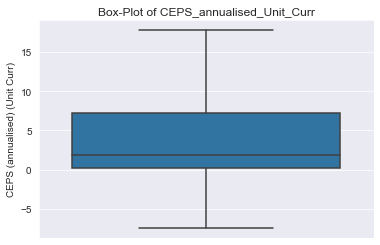

In [367]:
sns.boxplot(y = "CEPS (annualised) (Unit Curr)",data=credit_df_no_outlier)
plt.title("Box-Plot of CEPS_annualised_Unit_Curr")
plt.show()

In [368]:
lravg_Cash_Flow_From_Operating_Activities,uravg_Cash_Flow_From_Operating_Activities=remove_outlier(credit_df_no_outlier['Cash Flow From Operating Activities'])
credit_df_no_outlier['Cash Flow From Operating Activities']=np.where(credit_df_no_outlier['Cash Flow From Operating Activities']>uravg_Cash_Flow_From_Operating_Activities,uravg_Cash_Flow_From_Operating_Activities,credit_df_no_outlier['Cash Flow From Operating Activities'])
credit_df_no_outlier['Cash Flow From Operating Activities']=np.where(credit_df_no_outlier['Cash Flow From Operating Activities']<lravg_Cash_Flow_From_Operating_Activities,lravg_Cash_Flow_From_Operating_Activities,credit_df_no_outlier['Cash Flow From Operating Activities'])

lravg_Cash_Flow_From_Operating_Activities

-15.290000000000001

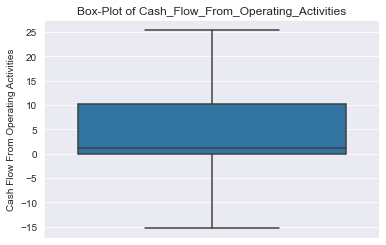

In [369]:
sns.boxplot(y = "Cash Flow From Operating Activities",data=credit_df_no_outlier)
plt.title("Box-Plot of Cash_Flow_From_Operating_Activities")
plt.show()

In [370]:
lravg_ROG_Total_Assets_Percentage,uravg_ROG_Total_Assets_Percentage=remove_outlier(credit_df_no_outlier['ROG-Total Assets (%)'])
credit_df_no_outlier['ROG-Total Assets (%)']=np.where(credit_df_no_outlier['ROG-Total Assets (%)']>uravg_ROG_Total_Assets_Percentage,uravg_ROG_Total_Assets_Percentage,credit_df_no_outlier['ROG-Total Assets (%)'])
credit_df_no_outlier['ROG-Total Assets (%)']=np.where(credit_df_no_outlier['ROG-Total Assets (%)']<lravg_ROG_Total_Assets_Percentage,lravg_ROG_Total_Assets_Percentage,credit_df_no_outlier['ROG-Total Assets (%)'])

lravg_ROG_Total_Assets_Percentage

-24.6

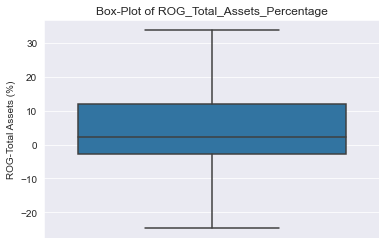

In [371]:
sns.boxplot(y = "ROG-Total Assets (%)",data=credit_df_no_outlier)
plt.title("Box-Plot of ROG_Total_Assets_Percentage")
plt.show()

In [372]:
lravg_ROG_Market_Capitalisation_Percentage,uravg_ROG_Market_Capitalisation_Percentage=remove_outlier(credit_df_no_outlier['ROG-Market Capitalisation (%)'])
credit_df_no_outlier['ROG-Market Capitalisation (%)']=np.where(credit_df_no_outlier['ROG-Market Capitalisation (%)']>uravg_ROG_Market_Capitalisation_Percentage,uravg_ROG_Market_Capitalisation_Percentage,credit_df_no_outlier['ROG-Market Capitalisation (%)'])
credit_df_no_outlier['ROG-Market Capitalisation (%)']=np.where(credit_df_no_outlier['ROG-Market Capitalisation (%)']<lravg_ROG_Market_Capitalisation_Percentage,lravg_ROG_Market_Capitalisation_Percentage,credit_df_no_outlier['ROG-Market Capitalisation (%)'])

lravg_ROG_Market_Capitalisation_Percentage

-73.28999999999999

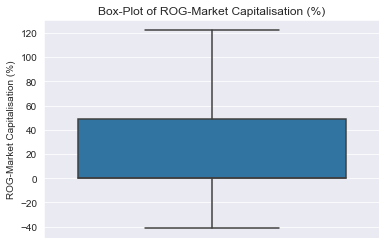

In [373]:
sns.boxplot(y = "ROG-Market Capitalisation (%)",data=credit_df_no_outlier)
plt.title("Box-Plot of ROG-Market Capitalisation (%)")
plt.show()

In [374]:
lravg_Current_Ratio_Latest,uravg_Current_Ratio_Latest=remove_outlier(credit_df_no_outlier['Current Ratio[Latest]'])
credit_df_no_outlier['Current Ratio[Latest]']=np.where(credit_df_no_outlier['Current Ratio[Latest]']>uravg_Current_Ratio_Latest,uravg_Current_Ratio_Latest,credit_df_no_outlier['Current Ratio[Latest]'])
credit_df_no_outlier['Current Ratio[Latest]']=np.where(credit_df_no_outlier['Current Ratio[Latest]']<lravg_Current_Ratio_Latest,lravg_Current_Ratio_Latest,credit_df_no_outlier['Current Ratio[Latest]'])

lravg_Current_Ratio_Latest

-1.2099999999999997

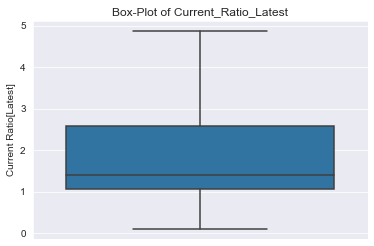

In [375]:
sns.boxplot(y = "Current Ratio[Latest]",data=credit_df_no_outlier)
plt.title("Box-Plot of Current_Ratio_Latest")
plt.show()

In [376]:
lravg_Interest_Cover_Ratio_Latest,uravg_Interest_Cover_Ratio_Latest=remove_outlier(credit_df_no_outlier['Interest Cover Ratio[Latest]'])
credit_df_no_outlier['Interest Cover Ratio[Latest]']=np.where(credit_df_no_outlier['Interest Cover Ratio[Latest]']>uravg_Interest_Cover_Ratio_Latest,uravg_Interest_Cover_Ratio_Latest,credit_df_no_outlier['Interest Cover Ratio[Latest]'])
credit_df_no_outlier['Interest Cover Ratio[Latest]']=np.where(credit_df_no_outlier['Interest Cover Ratio[Latest]']<lravg_Interest_Cover_Ratio_Latest,lravg_Interest_Cover_Ratio_Latest,credit_df_no_outlier['Interest Cover Ratio[Latest]'])

lravg_Interest_Cover_Ratio_Latest

-5.5649999999999995

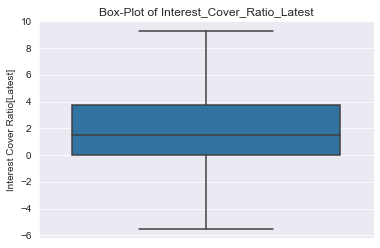

In [377]:
sns.boxplot(y = "Interest Cover Ratio[Latest]",data=credit_df_no_outlier)
plt.title("Box-Plot of Interest_Cover_Ratio_Latest")
plt.show()

**From the above, we have been able to clearly ascertain the removal of outliers from each of the variables under our consideration.**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]),
 [Text(1, 0, 'Co_Code'),
  Text(2, 0, 'Networth Next Year'),
  Text(3, 0, 'Equity Paid Up'),
  Text(4, 0, 'Networth'),
  Text(5, 0, 'Capital Employed'),
  Text(6, 0, 'Total Debt'),
  Text(7, 0, 'Gross Block '),
  Text(8, 0, 'Net Working Capital '),
  Text(9, 0, 'Current Assets '),
  Text(10, 0, 'Current Liabilities and Provisions '),
  Text(11, 0, 'Total Assets/Liabilities '),
  Text(12, 0, 'Gross Sales'),
  Text(13, 0, 'Net Sales'),
  Text(14, 0, 'Other Income'),
  Text(15, 0, 'Value Of Output'),
  Text(16, 0, 'Cost of Production'),
  Text(17, 0, 'Selling Cost'),
  Text(18, 0, 'PBIDT'),
  Text(19, 0, 'PBDT'),
  Text(20, 0, 'PBIT'),
  Text(21, 0, 'PBT'),
  Text(22, 0, 'PAT'),
  Text(23, 0, 'Ad

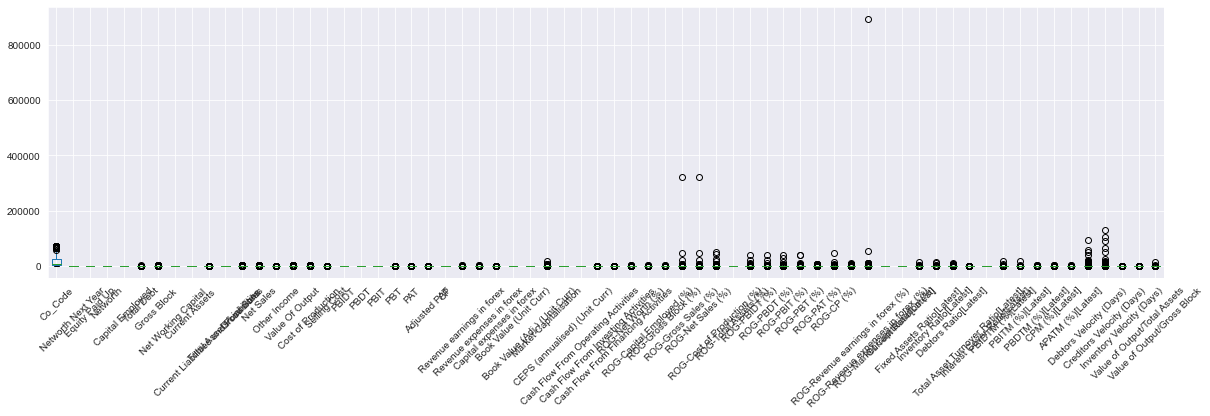

In [378]:
plt.figure(figsize = (20, 5))
credit_df_no_outlier.boxplot()
plt.xticks(rotation=45)

## **Bi-Variate Analysis**

In [379]:
def BivariateAnalysisPlot(segment_by):
    """A funtion to analyze the impact of features on the target variable"""
    
    fig, ax = plt.subplots(ncols=1,figsize = (10,8))
    
    #boxplot
    sns.boxplot(x = 'default', y = segment_by, data=credit_df_no_outlier)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()
    

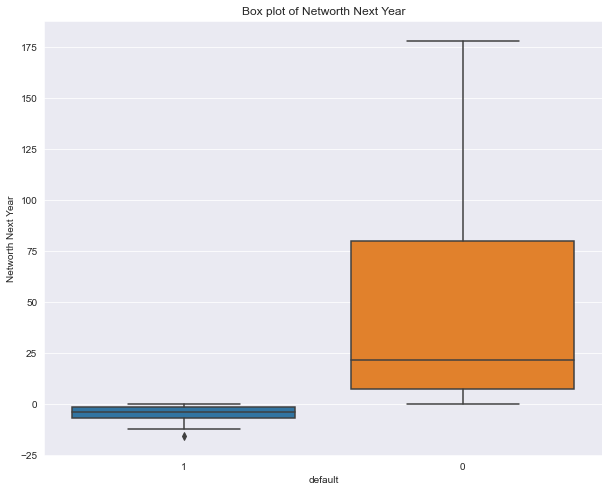

In [380]:
BivariateAnalysisPlot("Networth Next Year")

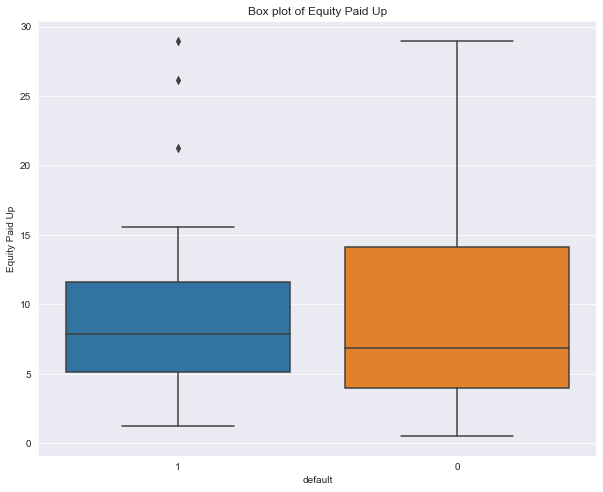

In [381]:
BivariateAnalysisPlot("Equity Paid Up")

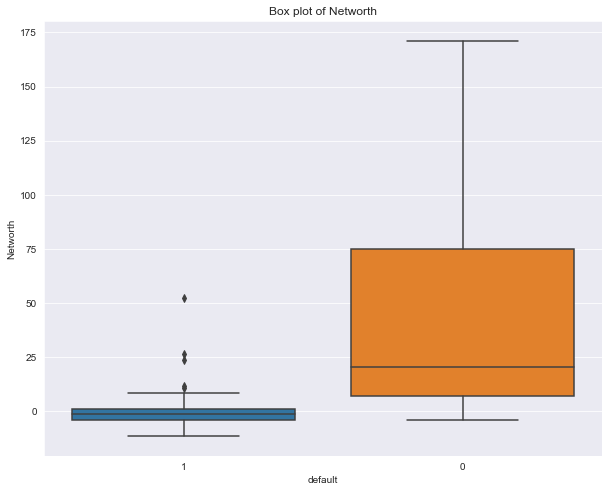

In [382]:
BivariateAnalysisPlot("Networth")

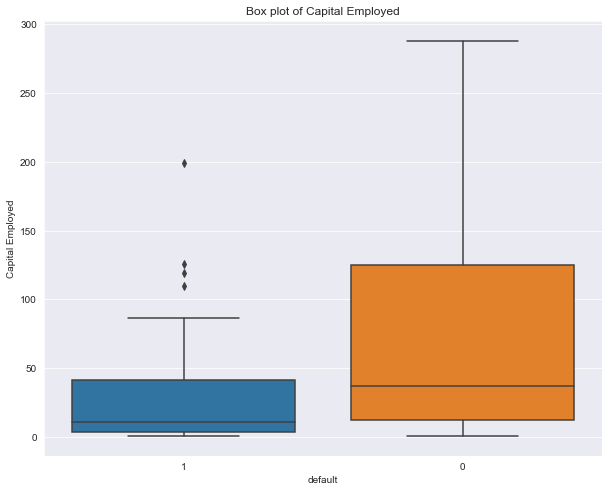

In [383]:
BivariateAnalysisPlot("Capital Employed")

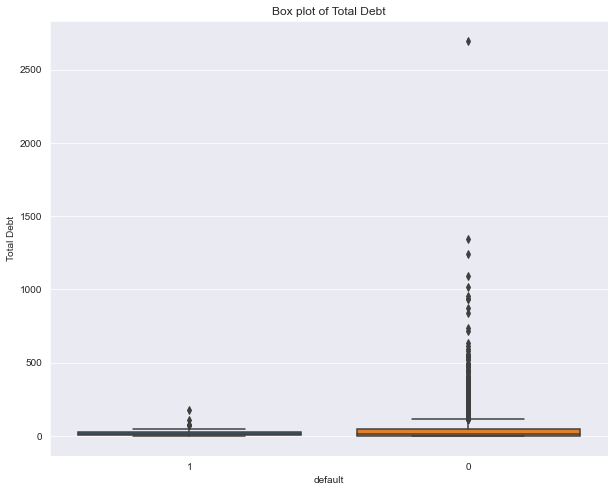

In [384]:
BivariateAnalysisPlot("Total Debt")

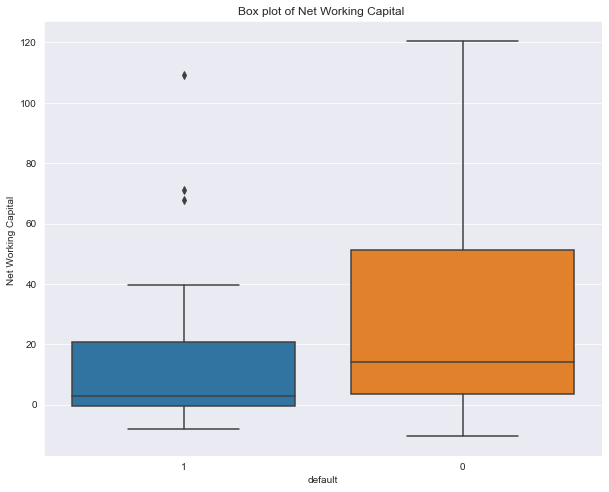

In [385]:
BivariateAnalysisPlot("Net Working Capital ")

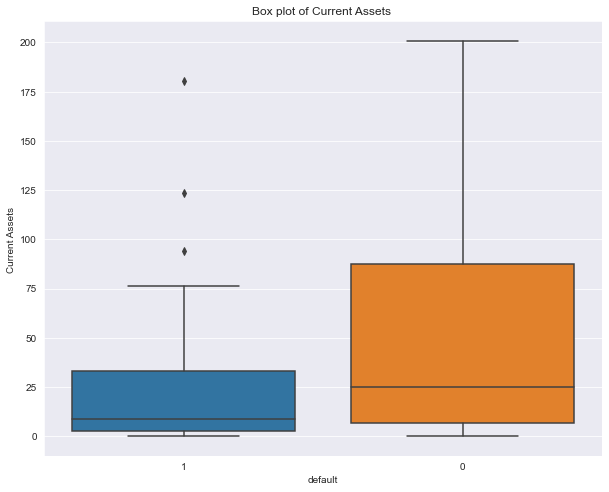

In [386]:
BivariateAnalysisPlot("Current Assets ")

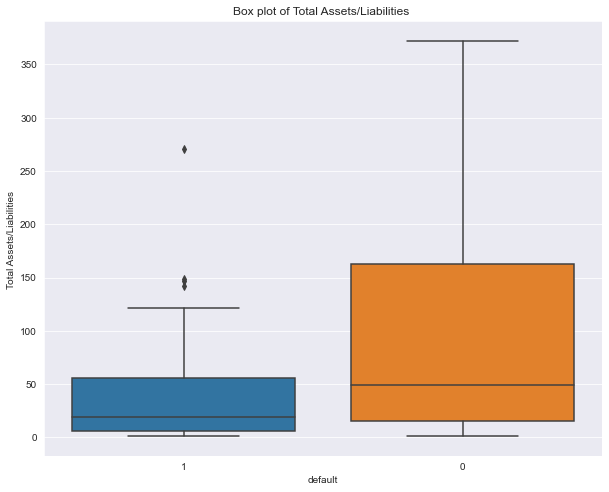

In [387]:
BivariateAnalysisPlot("Total Assets/Liabilities ")

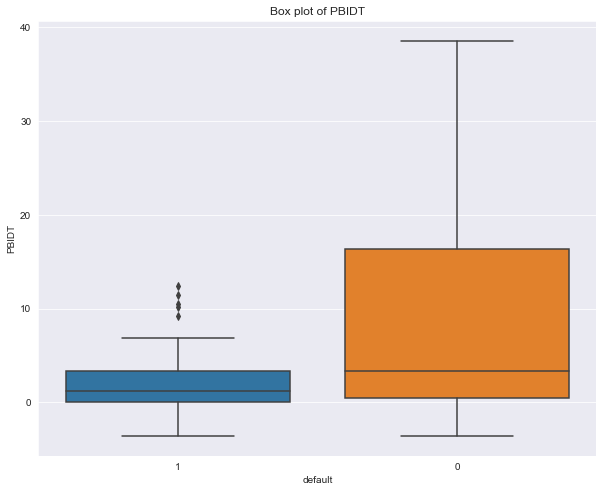

In [388]:
BivariateAnalysisPlot("PBIDT")

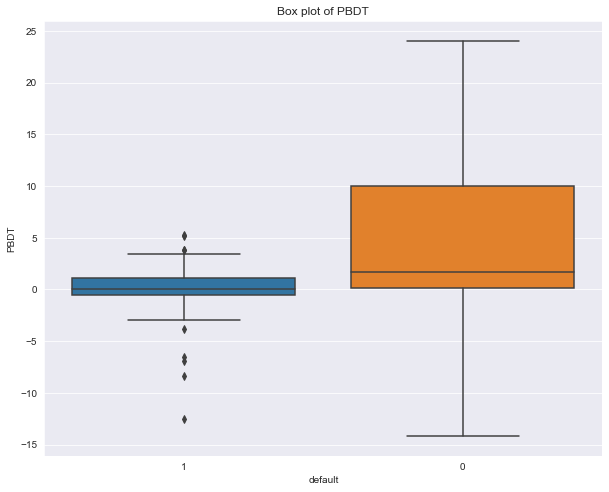

In [389]:
BivariateAnalysisPlot("PBDT")

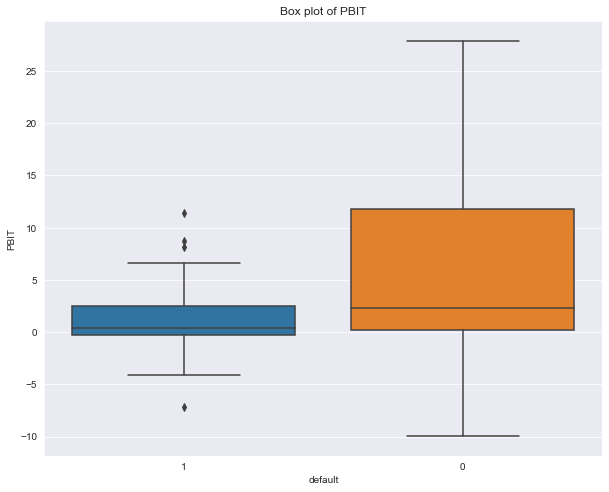

In [390]:
BivariateAnalysisPlot("PBIT")

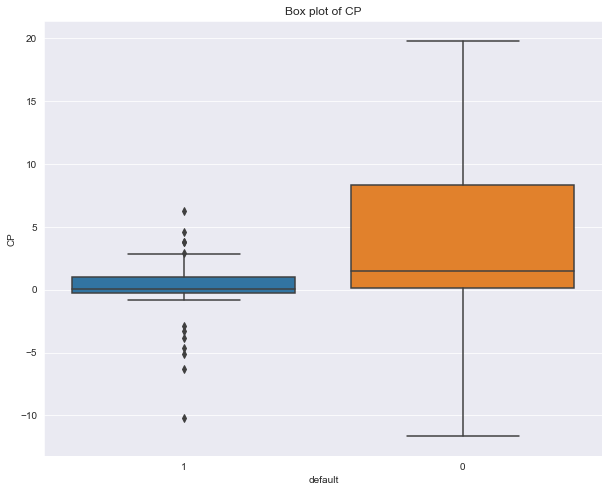

In [391]:
BivariateAnalysisPlot("CP")

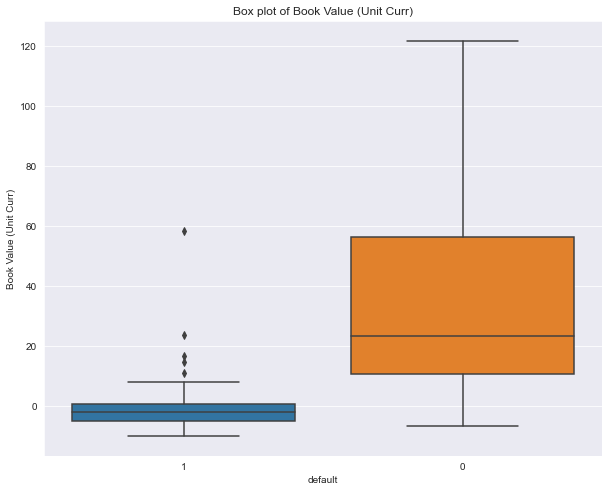

In [392]:
BivariateAnalysisPlot("Book Value (Unit Curr)")

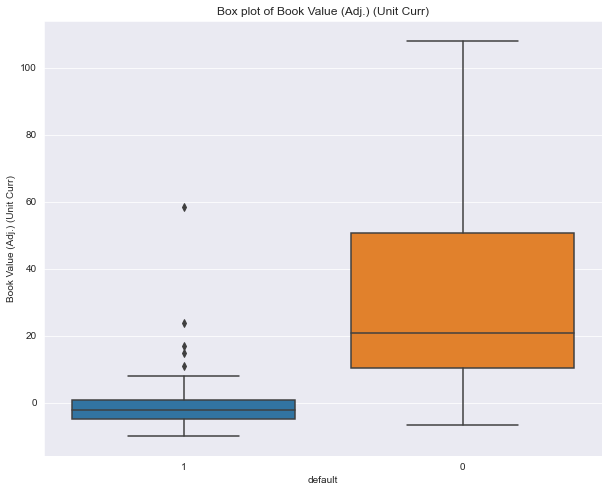

In [393]:
BivariateAnalysisPlot("Book Value (Adj.) (Unit Curr)")

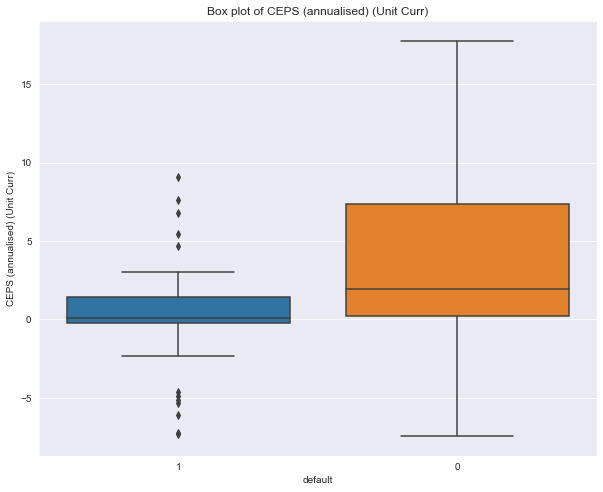

In [394]:
BivariateAnalysisPlot("CEPS (annualised) (Unit Curr)")

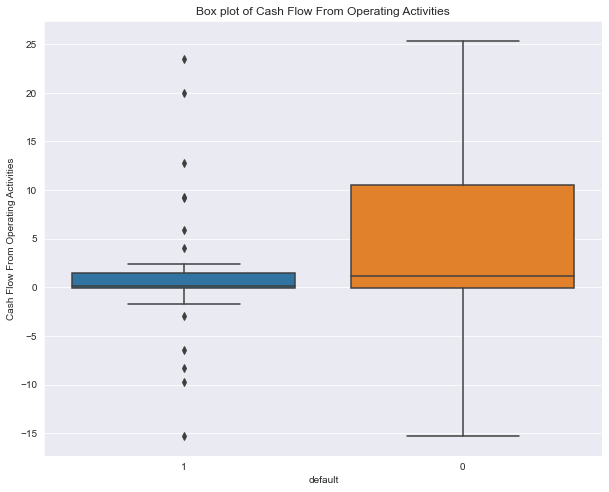

In [395]:
BivariateAnalysisPlot("Cash Flow From Operating Activities")

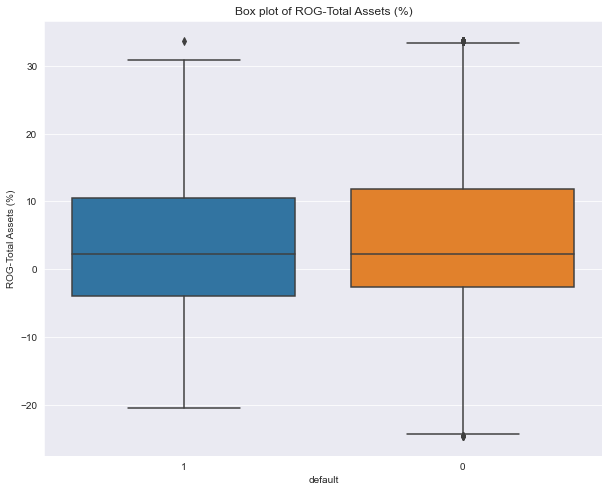

In [396]:
BivariateAnalysisPlot("ROG-Total Assets (%)")

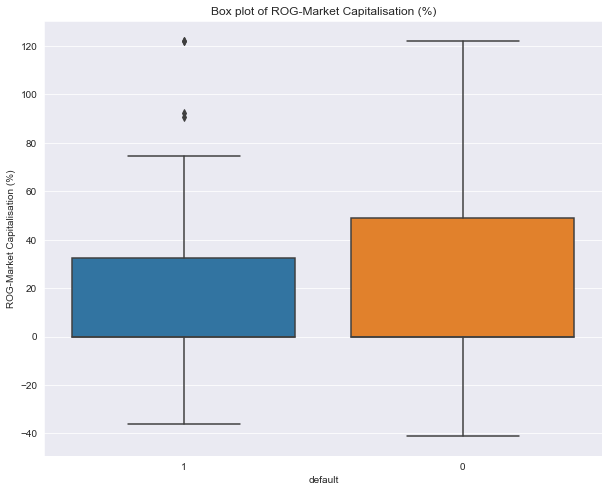

In [397]:
BivariateAnalysisPlot("ROG-Market Capitalisation (%)")

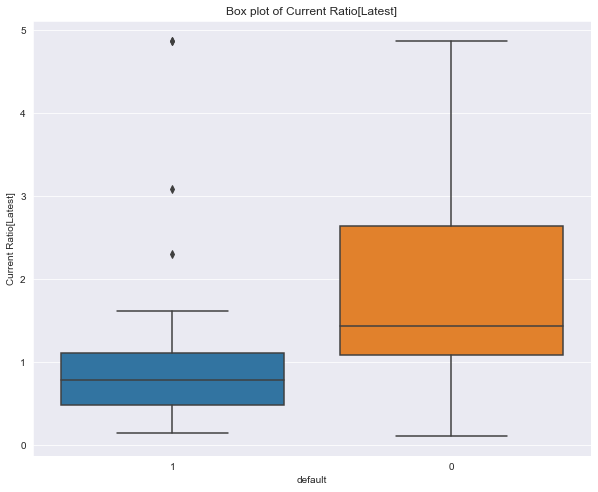

In [398]:
BivariateAnalysisPlot("Current Ratio[Latest]")

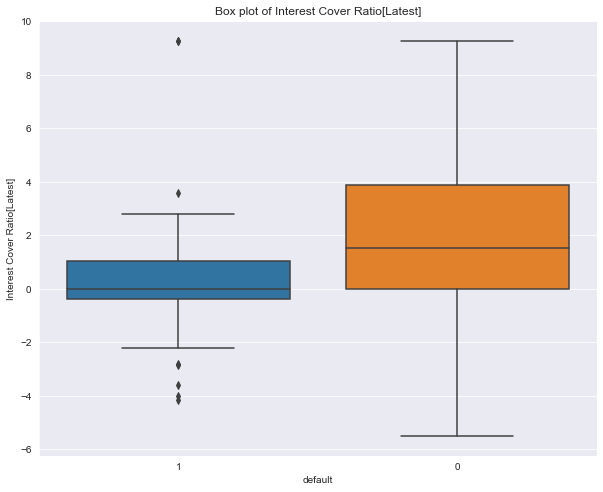

In [399]:
BivariateAnalysisPlot("Interest Cover Ratio[Latest]")

In [400]:
##Correlation Matrix Post Outlier Treatment 

In [401]:
credit_df_no_outlier.corr()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
Co_Code,1.000000,-0.101118,-0.087590,-0.117214,-0.113216,-0.084003,-0.128626,-0.091562,-0.109217,-0.081872,...,0.032485,0.030200,0.048819,0.032506,0.024352,-0.031898,-0.024394,-0.034462,0.087726,0.029757
Networth Next Year,-0.101118,1.000000,0.631843,0.987147,0.921810,0.528387,0.595386,0.767644,0.826135,0.551714,...,-0.017733,-0.016721,-0.012550,0.011470,0.027076,-0.053090,-0.046776,-0.011846,0.045488,-0.032664
Equity Paid Up,-0.087590,0.631843,1.000000,0.643991,0.626080,0.379685,0.423834,0.483225,0.528384,0.366088,...,-0.014412,-0.016784,-0.012199,0.019645,0.015206,0.020965,-0.024436,0.022577,-0.052108,-0.023469
Networth,-0.117214,0.987147,0.643991,1.000000,0.936066,0.538719,0.603936,0.777531,0.829555,0.554585,...,-0.004883,-0.003503,-0.008579,0.014621,0.032264,-0.048595,-0.044833,-0.003618,0.025208,-0.035176
Capital Employed,-0.113216,0.921810,0.626080,0.936066,1.000000,0.618616,0.638799,0.847250,0.910855,0.589427,...,-0.013341,-0.012137,-0.024604,0.001683,0.015078,-0.053874,-0.051683,-0.000444,0.071427,-0.041558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debtors Velocity (Days),-0.031898,-0.053090,0.020965,-0.048595,-0.053874,-0.030799,-0.036547,-0.042445,-0.049080,-0.030965,...,0.036379,0.019770,0.102482,0.099078,0.015398,1.000000,0.266136,0.070702,-0.080050,-0.007257
Creditors Velocity (Days),-0.024394,-0.046776,-0.024436,-0.044833,-0.051683,-0.028658,-0.031824,-0.048275,-0.047455,-0.024515,...,-0.002067,-0.002211,-0.003094,-0.002746,-0.004505,0.266136,1.000000,-0.041625,-0.037782,-0.003886
Inventory Velocity (Days),-0.034462,-0.011846,0.022577,-0.003618,-0.000444,0.021803,0.001748,0.030425,0.013243,0.009584,...,-0.024543,-0.022849,-0.045797,-0.043457,-0.045819,0.070702,-0.041625,1.000000,-0.104649,-0.008895
Value of Output/Total Assets,0.087726,0.045488,-0.052108,0.025208,0.071427,0.035656,0.045403,0.146366,0.166749,0.089275,...,-0.036277,-0.032117,-0.076436,-0.075174,-0.070469,-0.080050,-0.037782,-0.104649,1.000000,0.125084


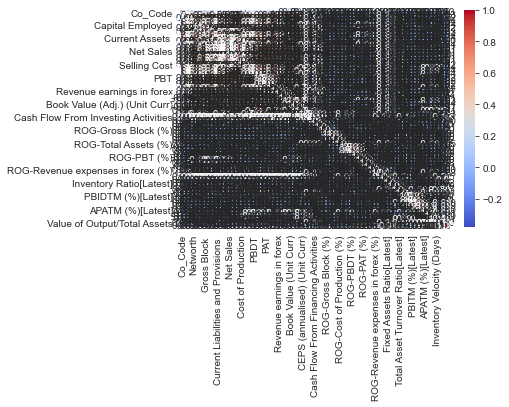

In [402]:
#Visualize the correlation using seaborn heatmap

sns.heatmap(credit_df_no_outlier.corr(),annot=True,fmt="0.2f",cmap="coolwarm")
plt.show()

In [403]:
credit_df_no_outlier.shape

(1525, 68)

In [404]:
#Indicator variable unique types

credit_df_no_outlier['default'].value_counts()

0    1482
1      43
Name: default, dtype: int64

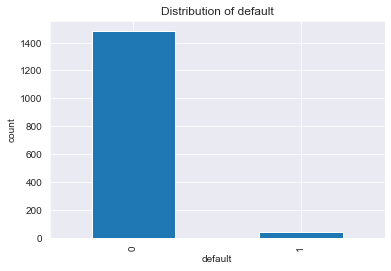

In [405]:
credit_df_no_outlier['default'].value_counts().plot.bar()
plt.xlabel("default")
plt.ylabel("count")
plt.title("Distribution of default")
plt.show()

#### Checking proportion of default

In [406]:
credit_df_no_outlier['default'].value_counts(normalize = True)

0    0.971803
1    0.028197
Name: default, dtype: float64

**From the above, we can infer that only 2.8% of the total data has default.**

In [407]:
credit_df_no_outlier

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
184,20790,Visu Intl.,-15.750,28.985,1.110,16.600,15.49,0.00,-3.59,0.180,...,0.000,0.000,0.000,0.000,0,895,0.0,0.00,0.00,1
198,3502,S R Inds.,-12.200,13.890,-10.140,42.510,37.86,30.09,19.90,34.850,...,15.510,6.160,6.160,2.320,81,87,129.0,0.80,1.44,1
200,6495,Trident Tools,-11.930,14.040,2.730,82.510,76.34,71.74,21.34,36.590,...,-21.435,-21.165,-17.085,-11.115,49,60,171.0,0.00,-0.01,1
205,21315,Kesoram Textile,-10.970,10.460,-11.130,1.510,9.56,26.85,0.50,1.420,...,0.000,0.000,0.000,0.000,0,0,0.0,0.00,0.00,1
206,3736,Athena Global,-10.330,7.860,-3.730,11.340,2.79,17.45,-0.05,8.820,...,2.650,4.060,4.060,1.510,118,135,616.0,0.65,0.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,24988,Mcleod Russel,178.085,28.985,171.185,288.145,404.37,1697.28,120.60,200.905,...,7.760,4.730,7.110,1.550,12,22,47.0,0.62,0.97,0
3358,23296,IIFL Holdings,178.085,28.985,171.185,288.145,50.00,1.48,45.44,64.190,...,92.310,89.080,81.810,81.510,5,0,0.0,0.13,82.02,0
3365,28294,Brigade Enterpr.,178.085,28.985,171.185,288.145,1241.45,1409.46,120.60,200.905,...,26.260,20.720,16.550,9.980,9,130,573.0,0.38,1.74,0
3370,1252,Finolex Inds.,178.085,28.985,171.185,288.145,637.06,1893.94,120.60,200.905,...,17.820,19.150,13.630,11.790,6,26,90.0,1.24,2.17,0


In [408]:
credit_df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 184 to 3393
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              1525 non-null   int64  
 1   Co_Name                              1525 non-null   object 
 2   Networth Next Year                   1525 non-null   float64
 3   Equity Paid Up                       1525 non-null   float64
 4   Networth                             1525 non-null   float64
 5   Capital Employed                     1525 non-null   float64
 6   Total Debt                           1525 non-null   float64
 7   Gross Block                          1525 non-null   float64
 8   Net Working Capital                  1525 non-null   float64
 9   Current Assets                       1525 non-null   float64
 10  Current Liabilities and Provisions   1525 non-null   float64
 11  Total Assets/Liabilities    

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [410]:
credit_df_no_outlier['default'].value_counts(normalize=True)

0    0.971803
1    0.028197
Name: default, dtype: float64

In [411]:
import statsmodels.formula.api as SM

In [412]:
credit_df_no_outlier.columns

Index(['Co_Code', 'Co_Name', 'Networth Next Year', 'Equity Paid Up',
       'Networth', 'Capital Employed', 'Total Debt', 'Gross Block ',
       'Net Working Capital ', 'Current Assets ',
       'Current Liabilities and Provisions ', 'Total Assets/Liabilities ',
       'Gross Sales', 'Net Sales', 'Other Income', 'Value Of Output',
       'Cost of Production', 'Selling Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted PAT', 'CP', 'Revenue earnings in forex',
       'Revenue expenses in forex', 'Capital expenses in forex',
       'Book Value (Unit Curr)', 'Book Value (Adj.) (Unit Curr)',
       'Market Capitalisation', 'CEPS (annualised) (Unit Curr)',
       'Cash Flow From Operating Activities',
       'Cash Flow From Investing Activities',
       'Cash Flow From Financing Activities', 'ROG-Net Worth (%)',
       'ROG-Capital Employed (%)', 'ROG-Gross Block (%)',
       'ROG-Gross Sales (%)', 'ROG-Net Sales (%)',
       'ROG-Cost of Production (%)', 'ROG-Total Assets (%)', 

In [413]:
## Converting the 'default' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [414]:
## Applying the created Label Encoder object for the target class

credit_df_no_outlier['default'] = LE.fit_transform(credit_df_no_outlier['default'])
credit_df_no_outlier.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block,default
184,20790,Visu Intl.,-15.75,28.985,1.11,16.60,15.49,0.00,-3.59,0.18,...,0.000,0.000,0.000,0.000,0,895,0.0,0.00,0.00,1
198,3502,S R Inds.,-12.20,13.890,-10.14,42.51,37.86,30.09,19.90,34.85,...,15.510,6.160,6.160,2.320,81,87,129.0,0.80,1.44,1
200,6495,Trident Tools,-11.93,14.040,2.73,82.51,76.34,71.74,21.34,36.59,...,-21.435,-21.165,-17.085,-11.115,49,60,171.0,0.00,-0.01,1
205,21315,Kesoram Textile,-10.97,10.460,-11.13,1.51,9.56,26.85,0.50,1.42,...,0.000,0.000,0.000,0.000,0,0,0.0,0.00,0.00,1
206,3736,Athena Global,-10.33,7.860,-3.73,11.34,2.79,17.45,-0.05,8.82,...,2.650,4.060,4.060,1.510,118,135,616.0,0.65,0.59,1


In [415]:
## Converting the other 'object' type variables as dummy variables

credit_df_no_outlier_dummy = pd.get_dummies(credit_df_no_outlier,drop_first=True)
credit_df_no_outlier_dummy.head()

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,Co_Name_York Exports,Co_Name_Yuken India,Co_Name_Zeal Aqua,Co_Name_Zee Learn,Co_Name_Zee Media,Co_Name_Zenith Exports,Co_Name_Zenith Fibres,Co_Name_Zenlabs Ethica,Co_Name_Zodiac Cloth. Co,Co_Name_Zota Health
184,20790,-15.75,28.985,1.11,16.60,15.49,0.00,-3.59,0.18,3.77,...,0,0,0,0,0,0,0,0,0,0
198,3502,-12.20,13.890,-10.14,42.51,37.86,30.09,19.90,34.85,14.95,...,0,0,0,0,0,0,0,0,0,0
200,6495,-11.93,14.040,2.73,82.51,76.34,71.74,21.34,36.59,15.25,...,0,0,0,0,0,0,0,0,0,0
205,21315,-10.97,10.460,-11.13,1.51,9.56,26.85,0.50,1.42,0.92,...,0,0,0,0,0,0,0,0,0,0
206,3736,-10.33,7.860,-3.73,11.34,2.79,17.45,-0.05,8.82,8.87,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [416]:
# Copy all the predictor variables into X dataframe
X = credit_df_no_outlier_dummy.drop('default', axis=1)

# Copy target into the y dataframe. 
y = credit_df_no_outlier_dummy['default']

In [417]:
# Split X and y into training and test set in 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=credit_df_no_outlier_dummy['default'])

In [418]:
y_train.value_counts(1)

0    0.971596
1    0.028404
Name: default, dtype: float64

In [419]:
y_test.value_counts(1)

0    0.972222
1    0.027778
Name: default, dtype: float64

In [420]:
#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

### Descriptive statistics of Target variable

In [421]:
Default_train["default"].value_counts()

0    992
1     29
Name: default, dtype: int64

### Checking if dataset is balanced

In [422]:
Default_train.default.sum() / len(Default_train.default)

0.02840352595494613

### Feature Selection

The optimal machine learning problem approach is to perform extensive EDA on dataset and understand properties of the predictors before even getting into training models on these variables. However, this is not always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of variables, which can quickly outrun human comprehension.

Feature selection is the process of tuning down the number of predictor variables used by the models you build.

For example, when faced with two models with the same or nearly the same score, but with the latter model using more variables, your immediate instinct should be to choose the one with fewer variables. That model is simpler to train, simpler to understand, easier to run, and less time consuming.

Lets start with feature selection methods & validate them back using manual feature selection using backward elimination approach:

### Lets try & test features manually using backward elimination approach:

### Model 1

In [423]:
 X_train

,Co_Code,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,...,Co_Name_York Exports,Co_Name_Yuken India,Co_Name_Zeal Aqua,Co_Name_Zee Learn,Co_Name_Zee Media,Co_Name_Zenith Exports,Co_Name_Zenith Fibres,Co_Name_Zenlabs Ethica,Co_Name_Zodiac Cloth. Co,Co_Name_Zota Health
2296,28967,49.490,20.800,49.390,50.490,0.83,73.76,-0.92,5.020,5.93,...,0,0,0,0,0,0,0,0,0,0
1637,71562,14.580,0.620,11.200,36.360,24.80,15.53,22.83,25.610,2.77,...,0,0,0,0,0,0,0,0,0,0
1680,26398,15.620,5.720,15.520,19.250,3.73,0.02,18.05,18.190,0.14,...,0,0,0,0,0,0,0,0,0,0
1251,65828,7.600,5.000,7.410,11.370,3.96,0.00,-4.23,4.550,8.77,...,0,0,0,0,0,0,0,0,0,0
2181,4519,38.370,28.985,38.110,38.210,0.10,1.98,2.39,5.460,3.07,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,13072,-6.890,11.500,-6.880,4.910,1.36,0.00,4.90,6.100,1.19,...,0,0,0,0,0,0,0,0,0,0
2395,26865,63.330,11.330,57.860,93.490,35.63,49.15,46.75,64.690,17.92,...,0,0,0,0,0,0,0,0,0,0
3139,4640,178.085,17.470,171.185,288.145,2696.58,3650.74,120.60,200.905,889.16,...,0,0,0,0,0,0,0,0,0,0
1252,4742,7.640,3.290,9.460,12.060,2.60,12.22,5.97,13.450,7.47,...,0,0,0,0,0,0,0,0,0,0


In [424]:
y_train

2296    0
1637    0
1680    0
1251    0
2181    0
       ..
242     1
2395    0
3139    0
1252    0
1748    0
Name: default, Length: 1021, dtype: int32

#### Logistic regression on 'default_smote' dataset

In [425]:
import statsmodels.api as sm
import pandas as pd

In [426]:
#Creating our first model using all variables
model_1 = SM.logit(formula = 'default ~ Networth + PBIDT + PBDT + PBIT + CP', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.074007
         Iterations 13


#### Checking the coefficients

In [427]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1021
Model:                          Logit   Df Residuals:                     1015
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.4270
Time:                        19:58:24   Log-Likelihood:                -75.561
converged:                       True   LL-Null:                       -131.86
Covariance Type:            nonrobust   LLR p-value:                 1.157e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5932      0.258     -6.177      0.000      -2.099      -1.088
Networth      -0.3606      0.060     -6.023      0.000      -0.478      -0.243
PBIDT         -0.0612      0.218     -0.281      0.778      -0.488       0.365
PBDT          -1.1058      0.376     -2.938      0.003      -1.843      -0.368
PBIT           0.2441      0.312      0.782      0.434      -0.368       0.856
CP             0.6330      0.475      1.334      0.182      -0.297       1.563
==============================================================================

Possibly complete quasi-separation: A fraction 0.50 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**We know that if the 'P' value is <0.05, it means that the variable is significant.** 

**If the 'P' value is >0.05, it means that the variable is not significant, or insignificant.** 

**The 'P' value indicates whether or not the variable is important with respect to your outcome of interest or not.**

#### Thus, from the above, only the variables, "Networth", and "PBDT" are significant. 

### Model 2

In [428]:
model_2 = SM.logit(formula = 'default ~ Networth + PBDT', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.079162
         Iterations 13


In [429]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1021
Model:                          Logit   Df Residuals:                     1018
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Feb 2022   Pseudo R-squ.:                  0.3870
Time:                        19:58:24   Log-Likelihood:                -80.824
converged:                       True   LL-Null:                       -131.86
Covariance Type:            nonrobust   LLR p-value:                 6.844e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4280      0.239     -5.965      0.000      -1.897      -0.959
Networth      -0.3422      0.057     -5.966      0.000      -0.455      -0.230
PBDT          -0.6253      0.155     -4.027      0.000      -0.930      -0.321
==============================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Now all the variables are significant, therefore, we don't need to eliminate any variable.

## Prediction on the Data

Now, let us see the predicted probability values.

In [430]:
y_prob_pred_train = model_2.predict(Default_train)
y_prob_pred_train

2296    2.233279e-09
1637    6.187302e-04
1680    1.096371e-03
1251    1.829321e-02
2181    5.063937e-07
            ...     
242     7.164021e-01
2395    3.006386e-14
3139    1.345297e-31
1252    6.308294e-03
1748    1.252611e-05
Length: 1021, dtype: float64

Let us now see the predicted classes

In [431]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

### Model Evaluation on the Training Data

### Let us now check the confusion matrix and the classification report followed by the AUC and the AUC-ROC curve.

In [432]:
from sklearn import metrics

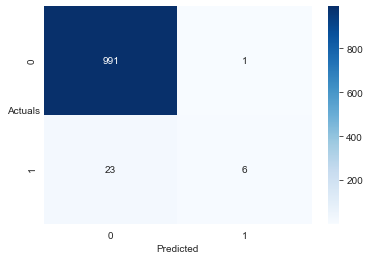

In [433]:
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [434]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.977     0.999     0.988       992
           1      0.857     0.207     0.333        29

    accuracy                          0.976      1021
   macro avg      0.917     0.603     0.661      1021
weighted avg      0.974     0.976     0.969      1021



Overall 97.6% of correct predictions to total predictions were made by the model.

20% of those defaulted were correctly identified as defaulters by the model

#### Now, let us see the predicted probability values on test dataset

In [435]:
y_prob_pred_test = model_2.predict(Default_test)
y_prob_pred_test

1160    1.964433e-02
3057    2.521137e-33
1679    5.193261e-04
3101    2.521137e-33
3179    2.521137e-33
            ...     
624     1.055201e-01
2328    6.808330e-11
749     1.566203e-01
483     3.113749e-02
2592    2.665946e-19
Length: 504, dtype: float64

#### Let us now see the predicted classes

In [436]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

### Model Evaluation on the Test Data

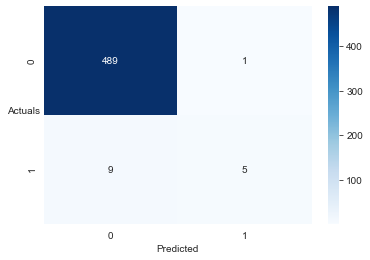

In [437]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

Let us now go ahead and print the classification report to check the various other parameters.

In [438]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.982     0.998     0.990       490
           1      0.833     0.357     0.500        14

    accuracy                          0.980       504
   macro avg      0.908     0.678     0.745       504
weighted avg      0.978     0.980     0.976       504



Overall 98% of correct predictions to total predictions were made by the model

35.7% of those defaulted were correctly identified as defaulters by the model

### Logistic Regression Model

In [439]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   16.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001,
                   verbose=True, warm_start=False)

### Predicting on Training and Test dataset

In [440]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [441]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,2.371634e-49
1,1.0,0.000000e+00
2,1.0,6.138061e-103
3,1.0,0.000000e+00
4,1.0,0.000000e+00


### Model Evaluation

In [442]:
# Accuracy - Training Data
model.score(X_train, y_train)

1.0

### AUC and ROC for the training data

AUC: 1.000


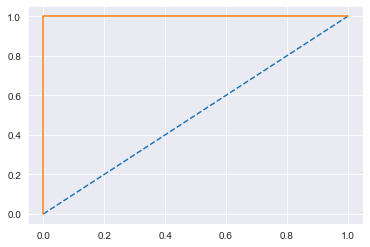

In [443]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [444]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9781746031746031

### AUC and ROC for the test data

AUC: 1.000


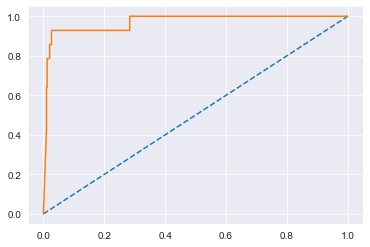

In [445]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

In [446]:
confusion_matrix(y_train, ytrain_predict)

array([[992,   0],
       [  0,  29]], dtype=int64)

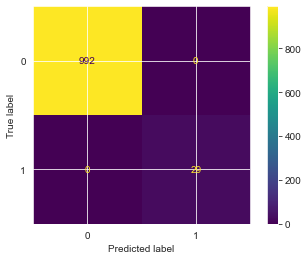

In [447]:
plot_confusion_matrix(model,X_train,y_train);

In [448]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00        29

    accuracy                           1.00      1021
   macro avg       1.00      1.00      1.00      1021
weighted avg       1.00      1.00      1.00      1021



### Confusion Matrix for test data

In [449]:
confusion_matrix(y_test, ytest_predict)

array([[482,   8],
       [  3,  11]], dtype=int64)

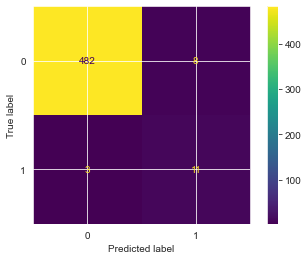

In [450]:
plot_confusion_matrix(model,X_test,y_test);

In [451]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       490
           1       0.58      0.79      0.67        14

    accuracy                           0.98       504
   macro avg       0.79      0.88      0.83       504
weighted avg       0.98      0.98      0.98       504



**Applying GridSearchCV for Logistic Regression**

In [452]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [453]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [454]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='recall')

In [455]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [456]:
GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='recall')

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [457]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [458]:
best_model = grid_search.best_estimator_

In [459]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [460]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,1.087930e-10
1,1.0,1.605212e-221
2,1.0,1.020237e-20
3,1.0,6.382096e-122
4,1.0,1.390451e-141


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00        29

    accuracy                           1.00      1021
   macro avg       1.00      1.00      1.00      1021
weighted avg       1.00      1.00      1.00      1021
 



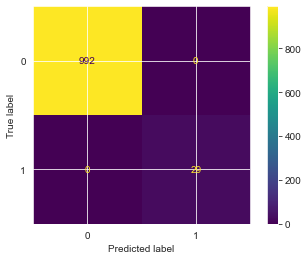

In [461]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       490
           1       0.65      0.93      0.76        14

    accuracy                           0.98       504
   macro avg       0.82      0.96      0.88       504
weighted avg       0.99      0.98      0.99       504
 



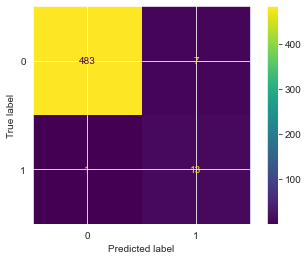

In [462]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

#### Train Test Split

In [463]:
# Copy all the predictor variables into X dataframe
X = credit_df_no_outlier_dummy.drop('default', axis=1)

# Copy target into the y dataframe. 
y = credit_df_no_outlier_dummy['default']

In [464]:
# Split X and y into training and test set in 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=credit_df_no_outlier_dummy['default'])

In [465]:
y_train.value_counts(1)

0    0.971596
1    0.028404
Name: default, dtype: float64

In [466]:
y_test.value_counts(1)

0    0.972222
1    0.027778
Name: default, dtype: float64

### Random Forest

In [467]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1,max_depth=4)
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [468]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9715964740450539
[[992   0]
 [ 29   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       992
           1       0.00      0.00      0.00        29

    accuracy                           0.97      1021
   macro avg       0.49      0.50      0.49      1021
weighted avg       0.94      0.97      0.96      1021



In [469]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9722222222222222
[[490   0]
 [ 14   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       490
           1       0.00      0.00      0.00        14

    accuracy                           0.97       504
   macro avg       0.49      0.50      0.49       504
weighted avg       0.95      0.97      0.96       504



### Confusion Matrix for the training data

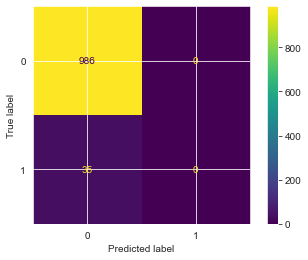

In [500]:
plot_confusion_matrix(RF_model,X_train,y_train);

### Confusion Matrix for the testing data

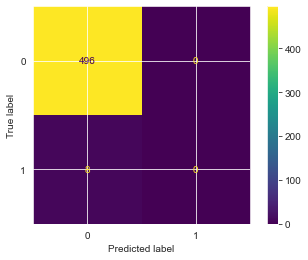

In [501]:
plot_confusion_matrix(RF_model,X_test,y_test)

### Discriminant Analysis (LDA)

In [470]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [471]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990205680705191
[[991   1]
 [  0  29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       0.97      1.00      0.98        29

    accuracy                           1.00      1021
   macro avg       0.98      1.00      0.99      1021
weighted avg       1.00      1.00      1.00      1021



In [472]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6150793650793651
[[301 189]
 [  5   9]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.76       490
           1       0.05      0.64      0.08        14

    accuracy                           0.62       504
   macro avg       0.51      0.63      0.42       504
weighted avg       0.96      0.62      0.74       504



### Confusion Matrix for the training data

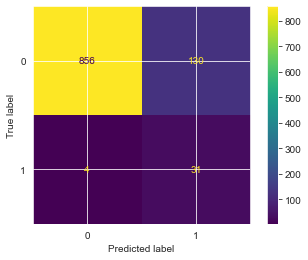

In [508]:
plot_confusion_matrix(LDA_model,X_train,y_train);

### Confusion Matrix for the testing data

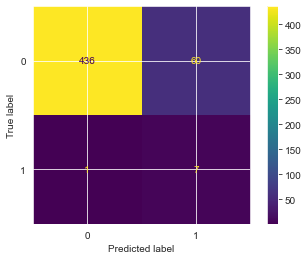

In [509]:
plot_confusion_matrix(LDA_model,X_test,y_test)

### Naive Bayes Model

In [473]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [474]:
from sklearn import set_config
set_config(print_changed_only=False)

In [475]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [476]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.623898139079334
[[609 383]
 [  1  28]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76       992
           1       0.07      0.97      0.13        29

    accuracy                           0.62      1021
   macro avg       0.53      0.79      0.44      1021
weighted avg       0.97      0.62      0.74      1021



In [477]:
y_test.value_counts()

0    490
1     14
Name: default, dtype: int64

In [478]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6329365079365079
[[307 183]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.99      0.63      0.77       490
           1       0.06      0.86      0.11        14

    accuracy                           0.63       504
   macro avg       0.53      0.74      0.44       504
weighted avg       0.97      0.63      0.75       504



### SMOTE

In [479]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [480]:
from imblearn.over_sampling import SMOTE

#### SMOTE is only applied on the train data set

In [481]:
y_train.shape

(1021,)

In [482]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [483]:
## Let's check the shape after SMOTE
X_train_res.shape

(1984, 1590)

In [484]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [485]:
from collections import Counter

In [486]:
Counter(y_train_res)

Counter({0: 992, 1: 992})

### Random Forest with SMOTE

In [487]:

from sklearn.ensemble import RandomForestClassifier

RF_SM_model=RandomForestClassifier(n_estimators=100,random_state=1,max_depth=4)
RF_SM_model.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [488]:
## Performance Matrix on train data set with SMOTE
y_train_predict = RF_SM_model.predict(X_train_res)
model_score =RF_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.983366935483871
[[962  30]
 [  3 989]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       992
           1       0.97      1.00      0.98       992

    accuracy                           0.98      1984
   macro avg       0.98      0.98      0.98      1984
weighted avg       0.98      0.98      0.98      1984



In [489]:
## Performance Matrix on test data set with SMOTE
y_test_predict = RF_SM_model.predict(X_test)
model_score = RF_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9583333333333334
[[470  20]
 [  1  13]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       490
           1       0.39      0.93      0.55        14

    accuracy                           0.96       504
   macro avg       0.70      0.94      0.77       504
weighted avg       0.98      0.96      0.97       504



### Confusion Matrix for the training data

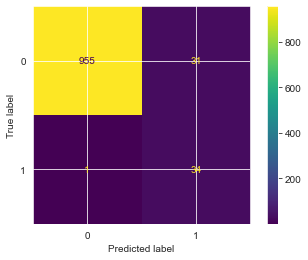

In [510]:
plot_confusion_matrix(RF_SM_model,X_train,y_train);

### Confusion Matrix for the testing data

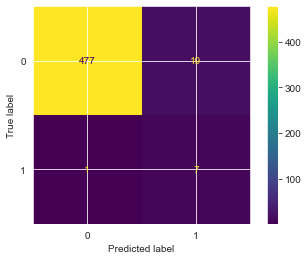

In [511]:
plot_confusion_matrix(RF_SM_model,X_test,y_test)

### Discriminant Analysis (LDA) with SMOTE

In [490]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_SM_model= LinearDiscriminantAnalysis()
LDA_SM_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [491]:
## Performance Matrix on train data set with SMOTE
y_train_predict = LDA_SM_model.predict(X_train_res)
model_score =LDA_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8140120967741935
[[991   1]
 [368 624]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       992
           1       1.00      0.63      0.77       992

    accuracy                           0.81      1984
   macro avg       0.86      0.81      0.81      1984
weighted avg       0.86      0.81      0.81      1984



In [492]:
## Performance Matrix on test data set with SMOTE
y_test_predict = LDA_SM_model.predict(X_test)
model_score = LDA_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6150793650793651
[[301 189]
 [  5   9]]
              precision    recall  f1-score   support

           0       0.98      0.61      0.76       490
           1       0.05      0.64      0.08        14

    accuracy                           0.62       504
   macro avg       0.51      0.63      0.42       504
weighted avg       0.96      0.62      0.74       504



### Confusion Matrix for the training data

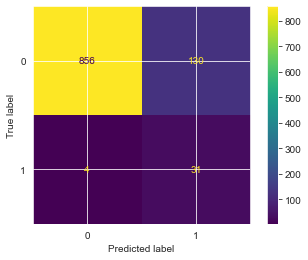

In [512]:
plot_confusion_matrix(LDA_SM_model,X_train,y_train);

### Confusion Matrix for the testing data

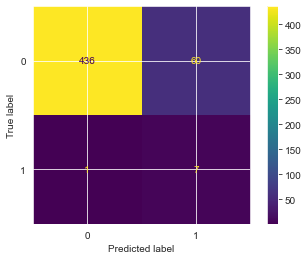

In [513]:
plot_confusion_matrix(LDA_SM_model,X_test,y_test)

### Comparison of Different Models (Without SMOTE Data)

Interest Class is 1 i.e. 'default' = 1

Let's look at the performance of all the models on the Train Data set

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.


[1] Logistic Regression Model:


                 precision  recall   f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00        29

    accuracy                           1.00      1021
   macro avg       1.00      1.00      1.00      1021
weighted avg       1.00      1.00      1.00      1021


[2] Random Forest: 

                 precision  recall    f1-score   support

           0       0.97      1.00      0.99       992
           1       0.00      0.00      0.00        29

    accuracy                           0.97      1021
   macro avg       0.49      0.50      0.49      1021
weighted avg       0.94      0.97      0.96      1021



[3] Discriminant Analysis (LDA)



                precision   recall   f1-score   support

           0       1.00      1.00      1.00       992
           1       0.97      1.00      0.98        29

    accuracy                           1.00      1021
   macro avg       0.98      1.00      0.99      1021
weighted avg       1.00      1.00      1.00      1021


[4] Naive Bayes Model: 


                precision   recall   f1-score   support

           0       1.00      0.61      0.76       992
           1       0.07      0.97      0.13        29

    accuracy                           0.62      1021
   macro avg       0.53      0.79      0.44      1021
weighted avg       0.97      0.62      0.74      1021



So as per the train data, Worst performing model is - Random Forest.  


Best Performing models are - Logistic Regression, Discriminant Analysis (LDA), and Naive Bayes Model. 

However are these best performing models overfitted? 

Let's look at the performance on the test data set



Recall on the Test Data Set

[1] Logistic Regression Model:

                 precision  recall   f1-score   support

           0       0.99      0.98      0.99       490
           1       0.58      0.79      0.67        14

    accuracy                           0.98       504
   macro avg       0.79      0.88      0.83       504
weighted avg       0.98      0.98      0.98       504






[2] Random Forest:


                precision   recall  f1-score   support

           0       0.97      1.00      0.99       490
           1       0.00      0.00      0.00        14

    accuracy                           0.97       504
   macro avg       0.49      0.50      0.49       504
weighted avg       0.95      0.97      0.96       504





[3] Discriminant Analysis (LDA)



                precision   recall   f1-score   support

           0       0.98      0.61      0.76       490
           1       0.05      0.64      0.08        14

    accuracy                           0.62       504
   macro avg       0.51      0.63      0.42       504
weighted avg       0.96      0.62      0.74       504




[4] Naive Bayes Model:


                precision   recall   f1-score   support

           0       0.99      0.63      0.77       490
           1       0.06      0.86      0.11        14

    accuracy                           0.63       504
   macro avg       0.53      0.74      0.44       504
weighted avg       0.97      0.63      0.75       504



### Inferences: 

#### The Random Forest Model which has not performed well on the train data set, has also not performed well on the test data set.

Having said this, Naive Bayes Model, Discriminant Analysis (LDA), and Logistic Regression Model which had a very high score on the train data set have shown a poor result on the test data set. Hence a clear case of overfitting.

However, overall, the "Logistic Regression Model" seems to be performing well on both Train and Test Data. 

### Comparison of Different Models (With SMOTE Data)
**This is done for Random Forest and LDA, since they were performing quite poorly.**

Let's look at the performance of all the models on the Train Data set



[1] Random Forest:

                 precision  recall   f1-score   support

           0       1.00      0.97      0.98       992
           1       0.97      1.00      0.98       992

    accuracy                           0.98      1984
   macro avg       0.98      0.98      0.98      1984
weighted avg       0.98      0.98      0.98      1984






[2] Discriminant Analysis (LDA):


                precision   recall   f1-score   support

           0       0.73      1.00      0.84       992
           1       1.00      0.63      0.77       992

    accuracy                           0.81      1984
   macro avg       0.86      0.81      0.81      1984
weighted avg       0.86      0.81      0.81      1984














### Let's look at the performance on the test data set

[1] Random Forest:


                precision   recall   f1-score   support

           0       1.00      0.96      0.98       490
           1       0.39      0.93      0.55        14

    accuracy                           0.96       504
   macro avg       0.70      0.94      0.77       504
weighted avg       0.98      0.96      0.97       504



[2] Discriminant Analysis (LDA):

                precision   recall   f1-score   support

           0       0.98      0.61      0.76       490
           1       0.05      0.64      0.08        14

    accuracy                           0.62       504
   macro avg       0.51      0.63      0.42       504
weighted avg       0.96      0.62      0.74       504



### Random Forest with SMOTE Data is performing much better. And overall, taking all models into account, Random Model with SMOTE data is best suited. 